In [482]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time 
import datetime 

from category_encoders.target_encoder import TargetEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.m_estimate import MEstimateEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

from scipy.stats import skew, kurtosis

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score

from catboost import CatBoostClassifier, MetricVisualizer, Pool, cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

from xgboost import XGBClassifier

In [483]:
df2 = pd.read_excel('train_Data.xlsx')

In [484]:
df2.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [485]:
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,470000,265601.0,...,1568,48879,40.17,M,25.0,65333.33,SONIPAT,HARYANA,131403.0,24-30 Months
128651,143391,Half Yearly,Arrear,Closed,Direct Debit,424,PANIPAT,24,460000,275630.0,...,1568,48879,59.92,M,25.0,83333.33,SONIPAT,HARYANA,131403.0,No Top-up Service
128652,143393,Monthly,Arrear,Active,Direct Debit,424,PANIPAT,23,545000,300733.0,...,1568,44118,52.38,M,36.0,248500.00,SONIPAT,HARYANA,131024.0,No Top-up Service
128653,143394,Half Yearly,Arrear,Active,Direct Debit,424,PANIPAT,35,350000,250962.0,...,1568,48879,50.37,M,37.0,84500.00,SONIPAT,HARYANA,131103.0,No Top-up Service


In [486]:
df2.describe()

,ID,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE
count,128655.000000,128655.000000,128655.000000,1.286550e+05,1.286550e+05,1.286550e+05,128655.000000,1.286550e+05,128655.000000,128655.000000,128655.000000,128596.000000,1.284210e+05,128283.000000
mean,70965.326556,166.289674,42.464778,5.550247e+05,3.483096e+05,3.479306e+05,55072.758506,1.639773e+07,1171.327271,56551.226210,59.126226,40.664803,5.032360e+04,427931.099725
std,41762.779285,115.844048,23.533972,1.083036e+05,1.055453e+05,1.053198e+05,28910.111740,9.539540e+06,257.790208,36399.355276,15.539038,11.712847,1.724607e+06,175704.364031
min,1.000000,1.000000,5.000000,2.000000e+05,5.000000e+04,2.894000e+03,0.000000,4.222710e+05,1019.000000,5879.000000,-1.380000,18.000000,0.000000e+00,110000.000000
25%,34408.500000,50.000000,36.000000,5.000000e+05,2.900000e+05,2.900000e+05,32500.000000,9.438948e+06,1046.000000,24093.000000,49.140000,31.000000,2.500000e+04,304804.000000
50%,70988.000000,152.000000,36.000000,5.507350e+05,3.500000e+05,3.500000e+05,59700.000000,1.513393e+07,1062.000000,39146.000000,60.780000,40.000000,3.583333e+04,458553.000000
75%,106549.500000,274.000000,48.000000,6.110000e+05,4.100000e+05,4.100000e+05,73800.000000,2.533396e+07,1186.000000,87034.000000,70.590000,49.000000,5.000000e+04,521131.000000
max,143395.000000,424.000000,501.000000,2.250000e+06,1.308351e+06,1.308351e+06,460000.000000,3.706667e+07,3473.000000,145518.000000,100.000000,90.000000,6.174775e+08,855456.000000


In [487]:
df2.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [488]:
removed_rows=[]

In [489]:
df2.Area.value_counts().sort_values(ascending=False)

LUCKNOW           9337
SIRSA             6575
NELLORE           5859
KANPUR            4573
INDORE            4024
                  ... 
MANDLA               9
BAGALKOT             8
GANGAPUR CITY        4
NAGAUR               2
UTTAR DINAJPUR       2
Name: Area, Length: 92, dtype: int64

In [490]:
df2.Area.unique()

array([nan, 'BHOPAL', 'GUNA', 'BILASPUR', 'RAIPUR', 'BHUBANESHWAR',
       'CUTTACK', 'BURDWAN', 'DURGAPUR', 'SILIGURI', 'UDAIPUR',
       'CHANDIGARH', 'LUDHIANA   RANI JHANSI ROAD', 'JAIPUR', 'JALANDHAR',
       'KANPUR', 'LUCKNOW', 'KARNAL', 'BANGALORE LALBAGH', 'NELLORE',
       'HUBLI', 'HYDERABAD BEGUMPET', 'KARIMNAGAR', 'MANGALORE', 'MYSORE',
       'MIRYALGUDA', 'NIZAMABAD', 'SINDHANUR', 'VIJAYAWADA',
       'VISHAKHAPATNAM', 'AHMEDABAD AMBAVADI', 'BARODA', 'GANDHIDHAM',
       'LATUR', 'NAGPUR', 'NASHIK', 'PARBHANI', 'AHMEDNAGAR', 'RAJKOT',
       'RAJAHMUNDRY', 'AURANGABAD', 'LUDHIANA FEROZ GANDHI MARKET',
       'NEW DELHI BARAKHAMBHA ROAD', 'INDORE', 'MANDSAUR', 'JABALPUR',
       'AKOLA', 'AMRAVATI', 'SIRSA', 'GULBARGA', 'HOSHANGABAD', 'KOTA',
       'KOLHAPUR', 'SIWAN', 'PATNA', 'BIKANER', 'VIDISHA', 'GUWAHATI',
       'JAMSHEDPUR', 'JHANSI', 'SOLAPUR', 'PUNE APTE ROAD', 'TUMKUR',
       'TADEPALLIGUDEM', 'MEHBOOBNAGAR', 'ANANTAPUR', 'BALASORE',
       'SAHARSA', 'BANKURA

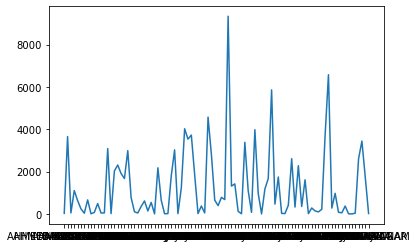

In [491]:
elements, counts = np.unique(df2.Area.dropna(), return_counts=True)
dict_area = {}

for i in range(len(elements)):
    dict_area[elements[i]] = counts[i]

plt.plot(elements,counts)

In [492]:
c, max_elements = 0, []
for i in range(len(counts)):
    if counts[i] >= 4000:
        c+=1
        max_elements.append(elements[i])
print(c, df2.Area.isnull().sum()/c)

5 2330.6


In [493]:
max_elements

['INDORE', 'KANPUR', 'LUCKNOW', 'NELLORE', 'SIRSA']

In [494]:
cc=0

for i in range(len(df2.Area)):
    if type(df2.Area[i])!='str' and cc<2330*1:
        df2.Area[i] = max_elements[0]
        cc+=1
    elif type(df2.Area[i])!='str' and cc<2330*2:
        df2.Area[i] = max_elements[1]
        cc+=1
    elif type(df2.Area[i])!='str' and cc<2330*3:
        df2.Area[i] = max_elements[2]
        cc+=1
    elif type(df2.Area[i])!='str' and cc<2330*4:
        df2.Area[i] = max_elements[3]
        cc+=1
    elif type(df2.Area[i])!='str':
        df2.Area[i] = max_elements[4]
        cc+=1

df2.Area.isnull().sum()

<ipython-input-494-9478a2a09572>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Area[i] = max_elements[0]
<ipython-input-494-9478a2a09572>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Area[i] = max_elements[1]
<ipython-input-494-9478a2a09572>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Area[i] = max_elements[2]
<ipython-input-494-9478a2a09572>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

0

In [495]:
df2.Area.isnull().sum()

0

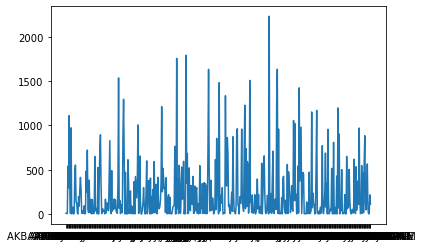

In [496]:
elements, counts = np.unique(df2.City.dropna(), return_counts=True)
dict_area = {}

for i in range(len(elements)):
    dict_area[elements[i]] = counts[i]

plt.plot(elements,counts)

In [497]:
c, max_elements = 0, []
for i in range(len(counts)):
    if counts[i] >= 1500:
        c+=1
        max_elements.append(elements[i])
print(c, df2.City.isnull().sum()/c)

7 1608.0


In [498]:
cc=0

for i in range(len(df2.City)):
    if type(df2.City[i])!='str' and cc<1608*1:
        df2.City[i] = max_elements[0]
        cc+=1
    elif type(df2.City[i])!='str' and cc<1608*2:
        df2.City[i] = max_elements[1]
        cc+=1
    elif type(df2.City[i])!='str' and cc<1608*3:
        df2.City[i] = max_elements[2]
        cc+=1
    elif type(df2.City[i])!='str' and cc<1608*4:
        df2.City[i] = max_elements[3]
        cc+=1
    elif type(df2.City[i])!='str':
        df2.City[i] = max_elements[4]
        cc+=1

df2.City.isnull().sum()

<ipython-input-498-27a901c6ed11>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.City[i] = max_elements[0]
<ipython-input-498-27a901c6ed11>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.City[i] = max_elements[1]
<ipython-input-498-27a901c6ed11>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.City[i] = max_elements[2]
<ipython-input-498-27a901c6ed11>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of

0

In [499]:
df2.SEX.value_counts()

M    122144
F      6452
Name: SEX, dtype: int64

In [500]:
df2.SEX = df2.SEX.fillna('M')
df2.SEX.isnull().sum()

0

In [501]:
df2.AGE.value_counts()

35.0    3926
40.0    3918
33.0    3908
37.0    3889
34.0    3889
        ... 
86.0       2
88.0       1
89.0       1
90.0       1
87.0       1
Name: AGE, Length: 73, dtype: int64

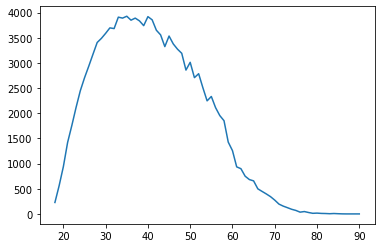

In [502]:
elements, counts = np.unique(df2.AGE.dropna(), return_counts=True)
dict_area = {}

for i in range(len(elements)):
    dict_area[elements[i]] = counts[i]

plt.plot(elements,counts)

In [503]:
for i in range(len(df2.AGE)):
    if np.isnan(df2.AGE[i]):
        df2.AGE[i] = np.random.randint(30,high=40)

df2.AGE.isnull().sum()

<ipython-input-503-1b535d0aa7cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.AGE[i] = np.random.randint(30,high=40)


0

<ipython-input-504-cccff246fb60>:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(elements),counts)


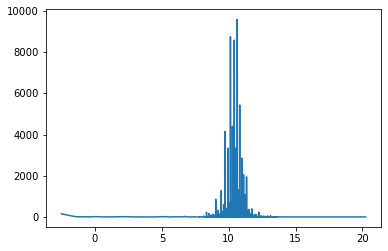

In [504]:
elements, counts = np.unique(df2.MonthlyIncome.dropna(), return_counts=True)
dict_area = {}

for i in range(len(elements)):
    dict_area[elements[i]] = counts[i]

plt.plot(np.log(elements),counts)

In [505]:
df2.MonthlyIncome.value_counts()

41666.67     9609
25000.00     8759
33333.33     8592
50000.00     5441
29166.67     4406
             ... 
73608.33        1
193695.83       1
106375.08       1
20493.33        1
24701.42        1
Name: MonthlyIncome, Length: 11568, dtype: int64

In [506]:
df2.MonthlyIncome.isnull().sum()

234

In [507]:
df2.MonthlyIncome = df2.MonthlyIncome.fillna(42666.67)

In [508]:
df2.ZiPCODE.value_counts()

125001.0    806
125055.0    690
584128.0    524
125050.0    409
334001.0    407
           ... 
583234.0      1
583233.0      1
583215.0      1
244104.0      1
524299.0      1
Name: ZiPCODE, Length: 9123, dtype: int64

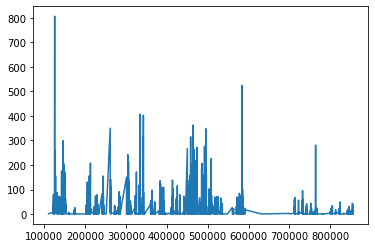

In [509]:
elements, counts = np.unique(df2.ZiPCODE.dropna(), return_counts=True)
dict_area = {}

for i in range(len(elements)):
    dict_area[elements[i]] = counts[i]

plt.plot(elements,counts)

In [510]:
k = df2.ZiPCODE.mode()
df2.ZiPCODE = df2.ZiPCODE.fillna(125001.0)

In [511]:
df2.ZiPCODE.isnull().sum()

0

In [512]:
df2.MaturityDAte.value_counts(), type(df2.MaturityDAte[0])

(2018-06-10    2298
 2017-06-10    2217
 2019-06-10    2195
 2017-12-10    2185
 2021-06-10    2180
               ... 
 2013-05-22       1
 2012-03-18       1
 2013-04-26       1
 2011-06-25       1
 2013-12-22       1
 Name: MaturityDAte, Length: 980, dtype: int64,
 pandas._libs.tslibs.timestamps.Timestamp)

In [513]:
date = '2018-06-10'
datetime_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
df2.MaturityDAte = df2.MaturityDAte.fillna(datetime_obj.date())

df2.MaturityDAte.isnull().sum()

0

In [514]:
df2.MaturityDAte.value_counts()

2018-06-10    2298
2017-06-10    2217
2019-06-10    2195
2017-12-10    2185
2021-06-10    2180
              ... 
2013-04-03       1
2019-04-15       1
2012-10-07       1
2025-06-05       1
2013-10-11       1
Name: MaturityDAte, Length: 981, dtype: int64

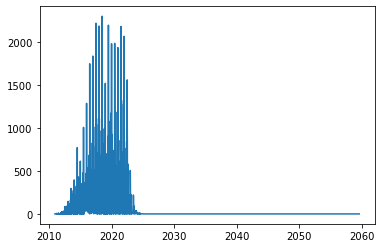

In [515]:
elements, counts = np.unique(df2.MaturityDAte, return_counts=True)
dict_area = {}

for i in range(len(elements)):
    dict_area[elements[i]] = counts[i]

plt.plot(elements,counts)

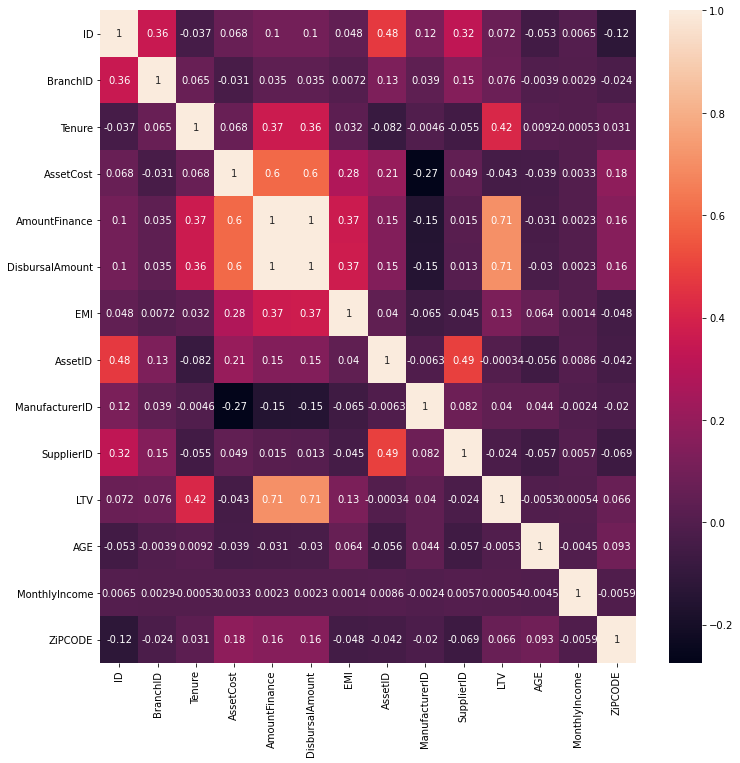

In [516]:
corr_matrix = df2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)

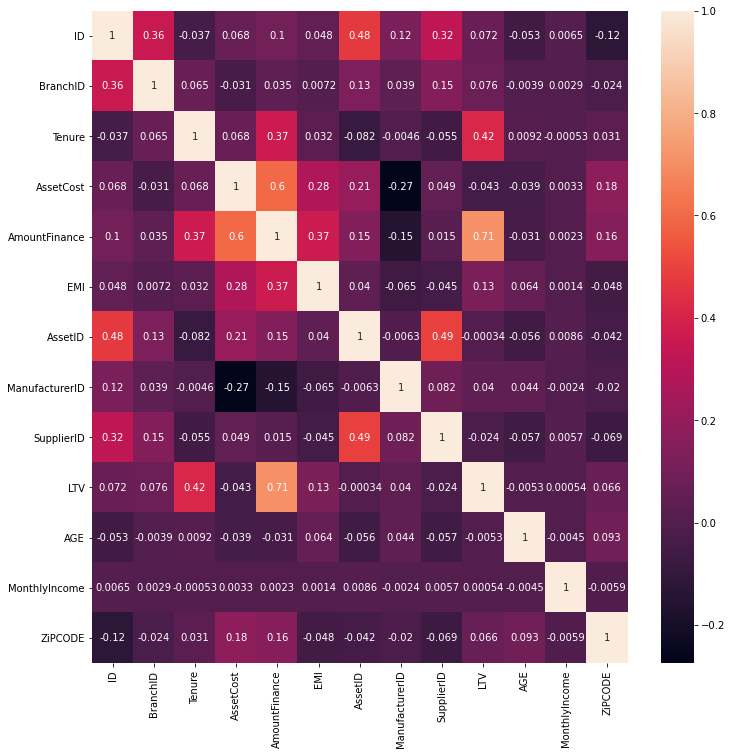

In [517]:
df2 = df2.drop(columns=['DisbursalAmount'])
corr_matrix = df2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)

In [518]:
df2 = df2.drop(columns=['AmountFinance'])

In [519]:
corr_matrix>0.6

,ID,BranchID,Tenure,AssetCost,AmountFinance,EMI,AssetID,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE
ID,True,False,False,False,False,False,False,False,False,False,False,False,False
BranchID,False,True,False,False,False,False,False,False,False,False,False,False,False
Tenure,False,False,True,False,False,False,False,False,False,False,False,False,False
AssetCost,False,False,False,True,False,False,False,False,False,False,False,False,False
AmountFinance,False,False,False,False,True,False,False,False,False,True,False,False,False
EMI,False,False,False,False,False,True,False,False,False,False,False,False,False
AssetID,False,False,False,False,False,False,True,False,False,False,False,False,False
ManufacturerID,False,False,False,False,False,False,False,True,False,False,False,False,False
SupplierID,False,False,False,False,False,False,False,False,True,False,False,False,False
LTV,False,False,False,False,True,False,False,False,False,True,False,False,False


In [520]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              128655 non-null  int64         
 1   Frequency       128655 non-null  object        
 2   InstlmentMode   128655 non-null  object        
 3   LoanStatus      128655 non-null  object        
 4   PaymentMode     128655 non-null  object        
 5   BranchID        128655 non-null  int64         
 6   Area            128655 non-null  object        
 7   Tenure          128655 non-null  int64         
 8   AssetCost       128655 non-null  int64         
 9   EMI             128655 non-null  float64       
 10  DisbursalDate   128655 non-null  datetime64[ns]
 11  MaturityDAte    128655 non-null  object        
 12  AuthDate        128655 non-null  datetime64[ns]
 13  AssetID         128655 non-null  int64         
 14  ManufacturerID  128655 non-null  int

In [521]:
df2.DisbursalDate = pd.to_datetime(df2.DisbursalDate).astype(np.int64)
df2.AuthDate = pd.to_datetime(df2.AuthDate).astype(np.int64)

In [522]:
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,EMI,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,INDORE,48,450000,24000.0,...,1568,21946,61.11,M,49.0,35833.33,BHIWANI,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,INDORE,47,485000,10500.0,...,1062,34802,70.00,M,23.0,666.67,BHIWANI,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,INDORE,68,690000,38300.0,...,1060,127335,69.77,M,39.0,45257.00,BHIWANI,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,INDORE,48,480000,11600.0,...,1060,25094,80.92,M,24.0,20833.33,BHIWANI,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,INDORE,44,619265,15000.0,...,1046,21853,71.05,M,56.0,27313.67,BHIWANI,CHATTISGARH,495442.0,36-48 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,Direct Debit,424,SIRSA,24,470000,76800.0,...,1568,48879,40.17,M,25.0,65333.33,MANDSAUR,HARYANA,131403.0,24-30 Months
128651,143391,Half Yearly,Arrear,Closed,Direct Debit,424,SIRSA,24,460000,80100.0,...,1568,48879,59.92,M,25.0,83333.33,MANDSAUR,HARYANA,131403.0,No Top-up Service
128652,143393,Monthly,Arrear,Active,Direct Debit,424,SIRSA,23,545000,15277.0,...,1568,44118,52.38,M,36.0,248500.00,MANDSAUR,HARYANA,131024.0,No Top-up Service
128653,143394,Half Yearly,Arrear,Active,Direct Debit,424,SIRSA,35,350000,74341.0,...,1568,48879,50.37,M,37.0,84500.00,MANDSAUR,HARYANA,131103.0,No Top-up Service


In [523]:
le = LabelEncoder()
df2['Top-up Month']  = le.fit_transform(df2['Top-up Month'])
df2['Top-up Month'] 

0         0
1         6
2         1
3         0
4         5
         ..
128650    3
128651    6
128652    6
128653    6
128654    6
Name: Top-up Month, Length: 128655, dtype: int32

In [524]:
'''cols = ['Frequency','InstlmentMode', 'LoanStatus', 'PaymentMode', 'BranchID', 'Area','SEX','City','State']

for i in cols:
    Mean_encoded_subject = df2.groupby([i])['Top-up Month'].mean().to_dict() 
    df2[i] =  df2[i].map(Mean_encoded_subject) 
    
df2 '''

"cols = ['Frequency','InstlmentMode', 'LoanStatus', 'PaymentMode', 'BranchID', 'Area','SEX','City','State']\n\nfor i in cols:\n    Mean_encoded_subject = df2.groupby([i])['Top-up Month'].mean().to_dict() \n    df2[i] =  df2[i].map(Mean_encoded_subject) \n    \ndf2 "

In [525]:
df2.Area.value_counts()

SIRSA      119335
NELLORE      2330
INDORE       2330
LUCKNOW      2330
KANPUR       2330
Name: Area, dtype: int64

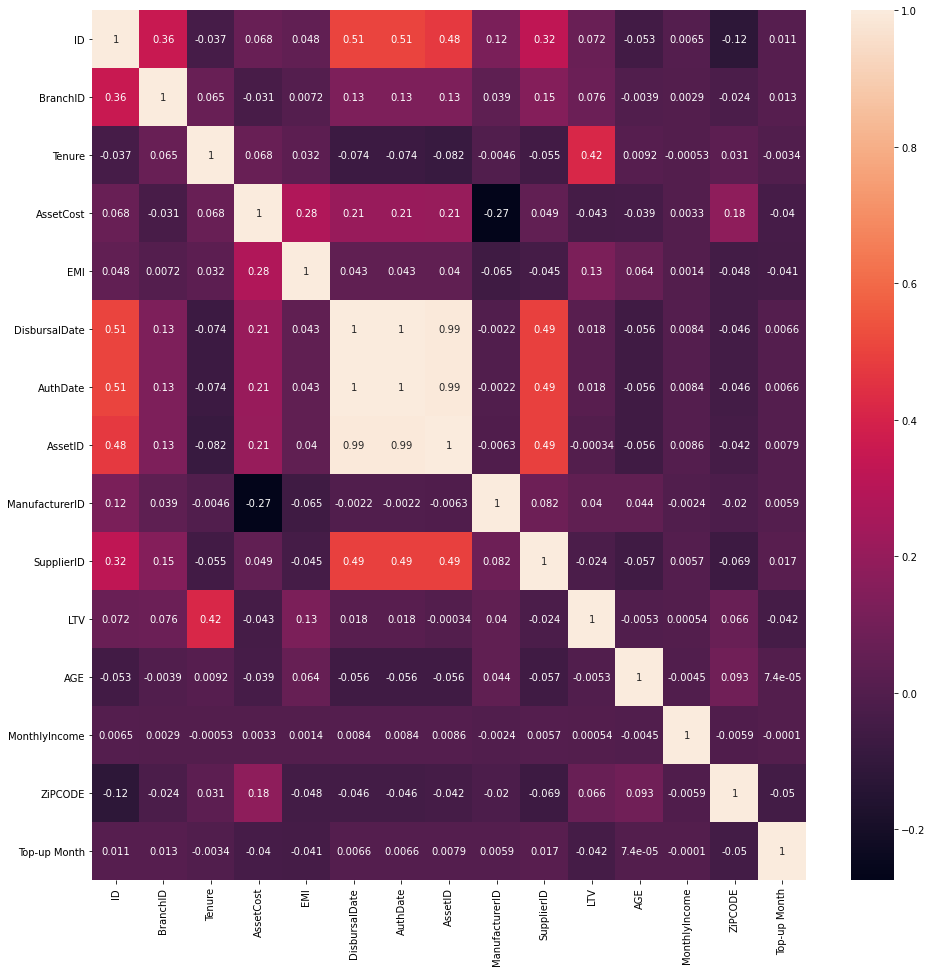

In [526]:
corr_matrix = df2.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True)

In [527]:
df2 = df2.drop(columns=['DisbursalDate','AuthDate','City','BranchID'])

In [528]:
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,MaturityDAte,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,INDORE,48,450000,24000.0,2016-01-15 00:00:00,4022465,1568,21946,61.11,M,49.0,35833.33,MADHYA PRADESH,464993.0,0
1,2,Monthly,Advance,Closed,PDC,INDORE,47,485000,10500.0,2016-02-15 00:00:00,4681175,1062,34802,70.00,M,23.0,666.67,MADHYA PRADESH,466001.0,6
2,3,Quatrly,Arrear,Active,Direct Debit,INDORE,68,690000,38300.0,2023-02-10 00:00:00,25328146,1060,127335,69.77,M,39.0,45257.00,MADHYA PRADESH,462030.0,1
3,7,Monthly,Advance,Closed,Billed,INDORE,48,480000,11600.0,2017-11-10 00:00:00,13021591,1060,25094,80.92,M,24.0,20833.33,MADHYA PRADESH,473335.0,0
4,8,Monthly,Arrear,Closed,Billed,INDORE,44,619265,15000.0,2015-07-05 00:00:00,3291320,1046,21853,71.05,M,56.0,27313.67,CHATTISGARH,495442.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,470000,76800.0,2020-06-05 00:00:00,31286914,1568,48879,40.17,M,25.0,65333.33,HARYANA,131403.0,3
128651,143391,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,460000,80100.0,2020-06-05 00:00:00,31295422,1568,48879,59.92,M,25.0,83333.33,HARYANA,131403.0,6
128652,143393,Monthly,Arrear,Active,Direct Debit,SIRSA,23,545000,15277.0,2020-11-05 00:00:00,32145629,1568,44118,52.38,M,36.0,248500.00,HARYANA,131024.0,6
128653,143394,Half Yearly,Arrear,Active,Direct Debit,SIRSA,35,350000,74341.0,2021-06-05 00:00:00,32509866,1568,48879,50.37,M,37.0,84500.00,HARYANA,131103.0,6


In [529]:
df2.MaturityDAte = pd.to_datetime(df2.MaturityDAte).astype(np.int64)

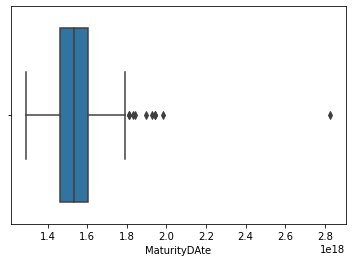

In [530]:
sns.boxplot(df2.MaturityDAte)

In [531]:
for i in range(len(df2.MaturityDAte)):
    if df2.MaturityDAte[i]>2.2*(10**18):
        df2 = df2.drop(i)
        removed_rows.append(i)
        
df2['Sl'] = np.arange(0,len(df2))
df2 = df2.set_index('Sl')

In [532]:
df2.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Area',
       'Tenure', 'AssetCost', 'EMI', 'MaturityDAte', 'AssetID',
       'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE', 'MonthlyIncome',
       'State', 'ZiPCODE', 'Top-up Month'],
      dtype='object')

In [533]:
df1 = pd.read_excel('train_bureau.xlsx')
df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,...,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,...,NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,...,F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,...,NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,...,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,...,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Closed,NaT,NaN,...,NaN,0,0.0,Standard,"20171231,20171130,20171001,20170930,20170831,2...",000000DDD054024024000000000000000000,"0,0,,67747,89638,111197,109562,130470,151135,1...","0,0,,22920,22920,22920,0,0,0,0,0,0",",,,,,,,,,,,,,",12.0
560840,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Active,2017-10-31,NaN,...,NaN,0,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",000000000000000000027028028DDD026030DDD0000000...,"0,0,14208,28265,42149,55874,69591,83001,96293,...","0,0,0,0,0,0,125,125,125,,125,125,,0,0,0,,,0,,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,",24.0
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31,Guarantor,Active,2016-11-28,NaN,...,NaN,NaN,0.0,Standard,"20200131,20191231,20191130,20191031,20190930,2...",XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX031XXXXXX0...,"101687,111161,120514,129749,138867,147870,1567...",",,,,,,,,,,,,10897,,,10763,,10771,21785,10885,,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",48.0
560842,143394,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-12-20,NaN,...,NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",0,"132487,132487,132487,191426,191426,191426,1914...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,",",,,,,,,,,,,,,,",NaN


In [534]:
df1.ID.unique()

array([     1,      2,      3, ..., 143393, 143394, 143395], dtype=int64)

In [535]:
df2.ID.unique()

array([     1,      2,      3, ..., 143393, 143394, 143395], dtype=int64)

In [536]:
df1.columns

Index(['ID', 'SELF-INDICATOR', 'MATCH-TYPE', 'ACCT-TYPE', 'CONTRIBUTOR-TYPE',
       'DATE-REPORTED', 'OWNERSHIP-IND', 'ACCOUNT-STATUS', 'DISBURSED-DT',
       'CLOSE-DT', 'LAST-PAYMENT-DATE', 'CREDIT-LIMIT/SANC AMT',
       'DISBURSED-AMT/HIGH CREDIT', 'INSTALLMENT-AMT', 'CURRENT-BAL',
       'INSTALLMENT-FREQUENCY', 'OVERDUE-AMT', 'WRITE-OFF-AMT', 'ASSET_CLASS',
       'REPORTED DATE - HIST', 'DPD - HIST', 'CUR BAL - HIST',
       'AMT OVERDUE - HIST', 'AMT PAID - HIST', 'TENURE'],
      dtype='object')

In [537]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560844 entries, 0 to 560843
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ID                         560844 non-null  int64         
 1   SELF-INDICATOR             560844 non-null  bool          
 2   MATCH-TYPE                 560844 non-null  object        
 3   ACCT-TYPE                  560844 non-null  object        
 4   CONTRIBUTOR-TYPE           560844 non-null  object        
 5   DATE-REPORTED              557161 non-null  datetime64[ns]
 6   OWNERSHIP-IND              560844 non-null  object        
 7   ACCOUNT-STATUS             560844 non-null  object        
 8   DISBURSED-DT               528694 non-null  datetime64[ns]
 9   CLOSE-DT                   309086 non-null  object        
 10  LAST-PAYMENT-DATE          241561 non-null  datetime64[ns]
 11  CREDIT-LIMIT/SANC AMT      15159 non-null   object  

In [538]:
df1.isnull().sum()

ID                                0
SELF-INDICATOR                    0
MATCH-TYPE                        0
ACCT-TYPE                         0
CONTRIBUTOR-TYPE                  0
DATE-REPORTED                  3683
OWNERSHIP-IND                     0
ACCOUNT-STATUS                    0
DISBURSED-DT                  32150
CLOSE-DT                     251758
LAST-PAYMENT-DATE            319283
CREDIT-LIMIT/SANC AMT        545685
DISBURSED-AMT/HIGH CREDIT         0
INSTALLMENT-AMT              420509
CURRENT-BAL                     233
INSTALLMENT-FREQUENCY        425135
OVERDUE-AMT                  118891
WRITE-OFF-AMT                 19123
ASSET_CLASS                  300376
REPORTED DATE - HIST          19123
DPD - HIST                    19647
CUR BAL - HIST                19123
AMT OVERDUE - HIST            19123
AMT PAID - HIST               20294
TENURE                       368107
dtype: int64

In [539]:
df1 = df1.drop(columns=['CLOSE-DT','LAST-PAYMENT-DATE','CREDIT-LIMIT/SANC AMT',
                       'INSTALLMENT-AMT','INSTALLMENT-FREQUENCY','OVERDUE-AMT',
                       'ASSET_CLASS','TENURE'])

In [540]:
df1 = df1.drop(columns=['WRITE-OFF-AMT'])

In [541]:
df1['REPORTED DATE - HIST'] = df1['REPORTED DATE - HIST'].fillna('00000000')
f = df1['REPORTED DATE - HIST'].copy(deep=True)
date_skew = np.zeros((len(f)))
date_rate = np.zeros((len(f)))
date_kurt = np.zeros((len(f)))

for i in range(len(f)):
    f_list = f[i].split(',')
    date_numeric = np.zeros((len(f_list)))
    
    for j in range(len(f_list)):
        j1 = f_list[j]
        if len(j1)<8:
            continue
        yr,mth,date = int(f_list[j][:4]), int(f_list[j][4:6]), int(f_list[j][4:6])
        date_numeric[j]=(yr*365) + (mth*30) + date

    date_skew[i] = skew(date_numeric)
    date_kurt[i] = kurtosis(date_numeric)
    
df1['REPORTED_DATE_skew'] = date_skew
df1['REPORTED_DATE_kurt'] = date_kurt

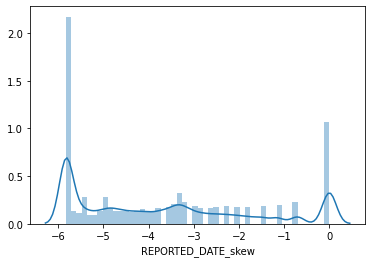

In [542]:
sns.distplot(df1['REPORTED_DATE_skew'])

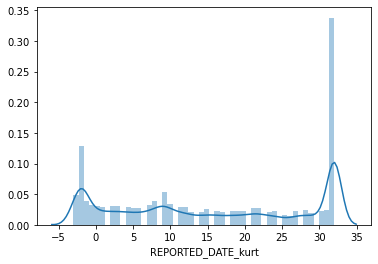

In [543]:
sns.distplot(df1['REPORTED_DATE_kurt'])

In [544]:
df1['CUR BAL - HIST'][1]

'20797,21988,23174,24341,25504,26648,27780,28910,30020,31128,32267,33427,34547,35655,36764,37850,38939,40004,41059,42118,44601,44181,'

In [545]:
df1['CUR BAL - HIST'] = df1['CUR BAL - HIST'].fillna('0')

f = df1['CUR BAL - HIST'].copy(deep=True)
curbal_skew = np.zeros((len(f)))
curbal_rate = np.zeros((len(f)))
curbal_kurt = np.zeros((len(f)))

for i in range(len(f)):
    f_list = f[i].split(',')
    curbal_numeric = np.zeros((len(f_list)))
    
    for j in range(len(f_list)):
        j1 = f_list[j]
        if len(j1)<3:
            continue
        curbal_numeric[j] = int(j1)
    curbal_skew[i] = skew(curbal_numeric)
    curbal_kurt[i] = kurtosis(curbal_numeric)
    curbal_rate[i] = np.sum(np.diff(curbal_numeric))
    
df1['CUR_BAL_skew'] = curbal_skew
df1['CUR_BAL_kurt'] = curbal_kurt
df1['CUR_BAL_diff'] = curbal_rate

In [546]:
df1['CUR_BAL_diff'] 

0         -37873.0
1         -20797.0
2        -116087.0
3              0.0
4              0.0
            ...   
560839         0.0
560840         0.0
560841   -101687.0
560842   -132487.0
560843   -105499.0
Name: CUR_BAL_diff, Length: 560844, dtype: float64

In [547]:
df1 = df1.drop(columns=['AMT PAID - HIST','AMT OVERDUE - HIST','DPD - HIST'])
df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,DISBURSED-AMT/HIGH CREDIT,CURRENT-BAL,REPORTED DATE - HIST,CUR BAL - HIST,REPORTED_DATE_skew,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,"37,352","37,873","20180430,20180331,","37873,12820,",-0.707107,-1.500000,0.371463,-1.500000,-37873.0
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,"44,000","20,797","20191231,20191130,20191031,20190930,20190831,2...","20797,21988,23174,24341,25504,26648,27780,2891...",-4.477203,18.045388,-1.239751,2.358584,-20797.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,"1,45,000","1,16,087","20200131,20191231,20191130,20191031,20190930,2...","116087,116087,145000,145000,145000,145000,",-2.041241,2.166666,-1.776343,1.553596,-116087.0
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,"3,00,000",0,"20170930,20170801,20170731,20170630,20170531,2...","0,,15925,23754,31494,39147,46713,54194,61590,6...",-5.833270,32.027301,-0.093333,-1.238515,0.0
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,"2,75,000",0,"20160229,20160131,20151231,20151130,20151031,2...","0,0,23658,23321,22989,46321,45662,45012,68030,...",-5.833270,32.027300,-0.159418,-1.162259,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Closed,NaT,"2,50,000",0,"20171231,20171130,20171001,20170930,20170831,2...","0,0,,67747,89638,111197,109562,130470,151135,1...",-3.175425,8.083327,-0.054713,-1.318291,0.0
560840,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Active,2017-10-31,"3,0,000",0,"20191231,20191130,20191031,20190930,20190831,2...","0,0,14208,28265,42149,55874,69591,83001,96293,...",-4.902883,22.038332,0.443409,-1.309943,0.0
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31,Guarantor,Active,2016-11-28,"3,93,819","1,1,687","20200131,20191231,20191130,20191031,20190930,2...","101687,111161,120514,129749,138867,147870,1567...",-5.833270,32.027301,-0.574452,-0.298838,-101687.0
560842,143394,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-12-20,"2,50,643","1,32,487","20200131,20191231,20191130,20191031,20190930,2...","132487,132487,132487,191426,191426,191426,1914...",-3.474394,10.071418,-1.346365,1.805630,-132487.0


In [548]:
df1 = df1.drop(columns=['REPORTED DATE - HIST','CUR BAL - HIST'])
df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,DISBURSED-AMT/HIGH CREDIT,CURRENT-BAL,REPORTED_DATE_skew,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,"37,352","37,873",-0.707107,-1.500000,0.371463,-1.500000,-37873.0
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,"44,000","20,797",-4.477203,18.045388,-1.239751,2.358584,-20797.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,"1,45,000","1,16,087",-2.041241,2.166666,-1.776343,1.553596,-116087.0
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,"3,00,000",0,-5.833270,32.027301,-0.093333,-1.238515,0.0
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,"2,75,000",0,-5.833270,32.027300,-0.159418,-1.162259,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Closed,NaT,"2,50,000",0,-3.175425,8.083327,-0.054713,-1.318291,0.0
560840,143393,False,PRIMARY,Tractor Loan,NBF,2019-12-31,Individual,Active,2017-10-31,"3,0,000",0,-4.902883,22.038332,0.443409,-1.309943,0.0
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,2020-01-31,Guarantor,Active,2016-11-28,"3,93,819","1,1,687",-5.833270,32.027301,-0.574452,-0.298838,-101687.0
560842,143394,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2018-12-20,"2,50,643","1,32,487",-3.474394,10.071418,-1.346365,1.805630,-132487.0


In [549]:
df1.isnull().sum()

ID                               0
SELF-INDICATOR                   0
MATCH-TYPE                       0
ACCT-TYPE                        0
CONTRIBUTOR-TYPE                 0
DATE-REPORTED                 3683
OWNERSHIP-IND                    0
ACCOUNT-STATUS                   0
DISBURSED-DT                 32150
DISBURSED-AMT/HIGH CREDIT        0
CURRENT-BAL                    233
REPORTED_DATE_skew               0
REPORTED_DATE_kurt               0
CUR_BAL_skew                     0
CUR_BAL_kurt                     0
CUR_BAL_diff                     0
dtype: int64

In [550]:
df1['DATE-REPORTED'] = pd.to_datetime(df1['DATE-REPORTED'].dropna()).astype(np.int64)
df1['DISBURSED-DT'] = pd.to_datetime(df1['DISBURSED-DT'].dropna()).astype(np.int64)

In [551]:
df1['DATE-REPORTED'] = df1['DATE-REPORTED'].interpolate(method='linear')
df1['DISBURSED-DT'] = df1['DISBURSED-DT'].interpolate(method='linear')

In [552]:
type(df1['CURRENT-BAL'][1])

str

In [553]:
df1['CURRENT-BAL'] = df1['CURRENT-BAL'].fillna('00')
f = df1['CURRENT-BAL'].copy(deep=True).to_numpy()
fh = np.zeros((len(f)))

for i in range(len(f)):
    l=0
    for j in f[i]:
        if j in [',','-']:
            f[i] = f[i].replace(j,'')
            
    fh[i] = int(f[i]) 

fh

array([ 37873.,  20797., 116087., ...,  11687., 132487.,  15499.])

In [554]:
df1['CURRENT-BAL'] = fh

In [555]:
df1['CURRENT-BAL']

0          37873.0
1          20797.0
2         116087.0
3              0.0
4              0.0
            ...   
560839         0.0
560840         0.0
560841     11687.0
560842    132487.0
560843     15499.0
Name: CURRENT-BAL, Length: 560844, dtype: float64

In [556]:
df1.isnull().sum()

ID                           0
SELF-INDICATOR               0
MATCH-TYPE                   0
ACCT-TYPE                    0
CONTRIBUTOR-TYPE             0
DATE-REPORTED                0
OWNERSHIP-IND                0
ACCOUNT-STATUS               0
DISBURSED-DT                 0
DISBURSED-AMT/HIGH CREDIT    0
CURRENT-BAL                  0
REPORTED_DATE_skew           0
REPORTED_DATE_kurt           0
CUR_BAL_skew                 0
CUR_BAL_kurt                 0
CUR_BAL_diff                 0
dtype: int64

In [557]:
df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,DISBURSED-AMT/HIGH CREDIT,CURRENT-BAL,REPORTED_DATE_skew,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff
0,1,False,PRIMARY,Overdraft,NAB,1.525046e+18,Individual,Delinquent,1.444003e+18,"37,352",37873.0,-0.707107,-1.500000,0.371463,-1.500000,-37873.0
1,1,False,PRIMARY,Auto Loan (Personal),NAB,1.577750e+18,Individual,Active,1.521418e+18,"44,000",20797.0,-4.477203,18.045388,-1.239751,2.358584,-20797.0
2,1,True,PRIMARY,Tractor Loan,NBF,1.580429e+18,Individual,Active,1.567123e+18,"1,45,000",116087.0,-2.041241,2.166666,-1.776343,1.553596,-116087.0
3,1,True,PRIMARY,Auto Loan (Personal),NBF,1.506730e+18,Individual,Closed,1.380240e+18,"3,00,000",0.0,-5.833270,32.027301,-0.093333,-1.238515,0.0
4,1,True,PRIMARY,Tractor Loan,NBF,1.456704e+18,Individual,Closed,1.328832e+18,"2,75,000",0.0,-5.833270,32.027300,-0.159418,-1.162259,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,1.577750e+18,Individual,Closed,1.526170e+18,"2,50,000",0.0,-3.175425,8.083327,-0.054713,-1.318291,0.0
560840,143393,False,PRIMARY,Tractor Loan,NBF,1.577750e+18,Individual,Active,1.509408e+18,"3,0,000",0.0,-4.902883,22.038332,0.443409,-1.309943,0.0
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,1.580429e+18,Guarantor,Active,1.480291e+18,"3,93,819",11687.0,-5.833270,32.027301,-0.574452,-0.298838,-101687.0
560842,143394,True,PRIMARY,Tractor Loan,NBF,1.580429e+18,Individual,Active,1.545264e+18,"2,50,643",132487.0,-3.474394,10.071418,-1.346365,1.805630,-132487.0


In [558]:
df1['DISBURSED-AMT/HIGH CREDIT']

0           37,352
1           44,000
2         1,45,000
3         3,00,000
4         2,75,000
            ...   
560839    2,50,000
560840     3,0,000
560841    3,93,819
560842    2,50,643
560843     2,0,428
Name: DISBURSED-AMT/HIGH CREDIT, Length: 560844, dtype: object

In [559]:
df1['DISBURSED-AMT/HIGH CREDIT'] = df1['DISBURSED-AMT/HIGH CREDIT'].fillna('00')
f = df1['DISBURSED-AMT/HIGH CREDIT'].copy(deep=True).to_numpy()
fh = np.zeros((len(f)))

for i in range(len(f)):
    l=0
    for j in f[i]:
        if j in [',','-']:
            f[i] = f[i].replace(j,'')
            
    fh[i] = int(f[i]) 

fh

array([ 37352.,  44000., 145000., ..., 393819., 250643.,  20428.])

In [560]:
df1['DISBURSED-AMT/HIGH CREDIT'] = fh
df1['DISBURSED-AMT/HIGH CREDIT']

0          37352.0
1          44000.0
2         145000.0
3         300000.0
4         275000.0
            ...   
560839    250000.0
560840     30000.0
560841    393819.0
560842    250643.0
560843     20428.0
Name: DISBURSED-AMT/HIGH CREDIT, Length: 560844, dtype: float64

In [561]:
df1['Sl'] = np.arange(len(df1))
df1 = df1.set_index('Sl')
df1

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,DISBURSED-AMT/HIGH CREDIT,CURRENT-BAL,REPORTED_DATE_skew,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff
Sl,,,,,,,,,,,,,,,,
0,1,False,PRIMARY,Overdraft,NAB,1.525046e+18,Individual,Delinquent,1.444003e+18,37352.0,37873.0,-0.707107,-1.500000,0.371463,-1.500000,-37873.0
1,1,False,PRIMARY,Auto Loan (Personal),NAB,1.577750e+18,Individual,Active,1.521418e+18,44000.0,20797.0,-4.477203,18.045388,-1.239751,2.358584,-20797.0
2,1,True,PRIMARY,Tractor Loan,NBF,1.580429e+18,Individual,Active,1.567123e+18,145000.0,116087.0,-2.041241,2.166666,-1.776343,1.553596,-116087.0
3,1,True,PRIMARY,Auto Loan (Personal),NBF,1.506730e+18,Individual,Closed,1.380240e+18,300000.0,0.0,-5.833270,32.027301,-0.093333,-1.238515,0.0
4,1,True,PRIMARY,Tractor Loan,NBF,1.456704e+18,Individual,Closed,1.328832e+18,275000.0,0.0,-5.833270,32.027300,-0.159418,-1.162259,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560839,143393,False,PRIMARY,Tractor Loan,NBF,1.577750e+18,Individual,Closed,1.526170e+18,250000.0,0.0,-3.175425,8.083327,-0.054713,-1.318291,0.0
560840,143393,False,PRIMARY,Tractor Loan,NBF,1.577750e+18,Individual,Active,1.509408e+18,30000.0,0.0,-4.902883,22.038332,0.443409,-1.309943,0.0
560841,143393,False,PRIMARY,Auto Loan (Personal),NBF,1.580429e+18,Guarantor,Active,1.480291e+18,393819.0,11687.0,-5.833270,32.027301,-0.574452,-0.298838,-101687.0


In [562]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560844 entries, 0 to 560843
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         560844 non-null  int64  
 1   SELF-INDICATOR             560844 non-null  bool   
 2   MATCH-TYPE                 560844 non-null  object 
 3   ACCT-TYPE                  560844 non-null  object 
 4   CONTRIBUTOR-TYPE           560844 non-null  object 
 5   DATE-REPORTED              560844 non-null  float64
 6   OWNERSHIP-IND              560844 non-null  object 
 7   ACCOUNT-STATUS             560844 non-null  object 
 8   DISBURSED-DT               560844 non-null  float64
 9   DISBURSED-AMT/HIGH CREDIT  560844 non-null  float64
 10  CURRENT-BAL                560844 non-null  float64
 11  REPORTED_DATE_skew         560844 non-null  float64
 12  REPORTED_DATE_kurt         560844 non-null  float64
 13  CUR_BAL_skew               56

In [563]:
train_index = list(df2['ID'])
train_index[:5]

[1, 2, 3, 7, 8]

In [564]:
for i in range(len(df1)):
    if df1['ID'][i]==removed_rows[0]+1:
        df1 = df1.drop(i)
        
len(df1['ID'].unique())

128654

# df1 Numerical Feature Engineering

In [565]:
c=0
k1=[None]*len(train_index)
k2=[None]*len(train_index)
k3=[None]*len(train_index)
k4=[None]*len(train_index)
k5=[None]*len(train_index)
k6=[None]*len(train_index)
k7=[None]*len(train_index)
k8=[None]*len(train_index)
k9=[None]*len(train_index)

for i in train_index:
    p1 = list(df1['DATE-REPORTED'][df1['ID']==i])
    p2 = list(df1['DISBURSED-DT'][df1['ID']==i])
    p3 = list(df1['CURRENT-BAL'][df1['ID']==i])
    p4 = list(df1['REPORTED_DATE_skew'][df1['ID']==i])
    p5 = list(df1['REPORTED_DATE_kurt'][df1['ID']==i])
    p6 = list(df1['CUR_BAL_skew'][df1['ID']==i])
    p7 = list(df1['CUR_BAL_kurt'][df1['ID']==i])
    p8 = list(df1['CUR_BAL_diff'][df1['ID']==i])
    p9 = list(df1['DISBURSED-AMT/HIGH CREDIT'][df1['ID']==i])
    
    k1[c] = np.sum(np.diff(p1))
    k2[c] = np.sum(np.diff(p2))
    k3[c] = np.sum(np.diff(p3))
    k4[c] = np.mean(p4)
    k5[c] = np.mean(p5)
    k6[c] = np.mean(p6)
    k7[c] = np.mean(p7)
    k8[c] = np.mean(p8)
    k9[c] = np.mean(p9)
    
    c+=1
    
df2['DATE-REPORTED'] = k1
df2['DISBURSED-DT'] = k2
df2['CURRENT-BAL'] = k3 
df2['REPORTED_DATE_skew'] = k4
df2['REPORTED_DATE_kurt'] = k5
df2['CUR_BAL_skew'] = k6
df2['CUR_BAL_kurt'] = k7
df2['CUR_BAL_diff'] = k8
df2['DISBURSED-AMT/HIGH CREDIT'] = k9

C:\Users\ANURAG MUKHERJEE\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ANURAG MUKHERJEE\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [566]:
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,MaturityDAte,...,Top-up Month,DATE-REPORTED,DISBURSED-DT,CURRENT-BAL,REPORTED_DATE_skew,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT
Sl,,,,,,,,,,,,,,,,,,,,,
0,1,Monthly,Arrear,Closed,PDC_E,INDORE,48,450000,24000.0,1452816000000000000,...,0,-2.358720e+16,-7.309440e+16,-37873.0,-3.909747,17.358446,-0.646473,0.558120,-71464.000000,2.445947e+05
1,2,Monthly,Advance,Closed,PDC,INDORE,47,485000,10500.0,1455494400000000000,...,6,7.361280e+16,-8.026560e+16,0.0,-3.453162,13.947912,-0.146306,0.994214,-796112.076923,1.393622e+06
2,3,Quatrly,Arrear,Active,Direct Debit,INDORE,68,690000,38300.0,1675987200000000000,...,1,4.199040e+16,2.964240e+16,0.0,-2.696754,8.053177,-0.594113,-0.600568,-75327.903226,1.196248e+05
3,7,Monthly,Advance,Closed,Billed,INDORE,48,480000,11600.0,1510272000000000000,...,0,3.153600e+16,1.473120e+17,0.0,-3.982936,16.083881,-1.001970,1.153509,-156000.000000,3.181382e+05
4,8,Monthly,Arrear,Closed,Billed,INDORE,44,619265,15000.0,1436054400000000000,...,5,2.678400e+15,7.300800e+16,45300.0,-4.395518,19.058395,-0.998787,0.493721,-139159.857143,2.893166e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,143390,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,470000,76800.0,1591315200000000000,...,3,-2.678400e+15,2.972160e+16,1725516.0,-2.690283,6.654400,-0.972829,0.071876,-933815.000000,1.043800e+06
128650,143391,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,460000,80100.0,1591315200000000000,...,6,0.000000e+00,0.000000e+00,0.0,-3.880565,13.058800,-0.446012,-0.098809,-73890.000000,2.756300e+05
128651,143393,Monthly,Arrear,Active,Direct Debit,SIRSA,23,545000,15277.0,1604534400000000000,...,6,0.000000e+00,-6.264000e+16,-130759.0,-4.381590,18.303903,-0.358243,-0.304922,-61033.250000,1.761380e+05


In [567]:
df2.isnull().sum()

ID                           0
Frequency                    0
InstlmentMode                0
LoanStatus                   0
PaymentMode                  0
Area                         0
Tenure                       0
AssetCost                    0
EMI                          0
MaturityDAte                 0
AssetID                      0
ManufacturerID               0
SupplierID                   0
LTV                          0
SEX                          0
AGE                          0
MonthlyIncome                0
State                        0
ZiPCODE                      0
Top-up Month                 0
DATE-REPORTED                0
DISBURSED-DT                 0
CURRENT-BAL                  0
REPORTED_DATE_skew           1
REPORTED_DATE_kurt           1
CUR_BAL_skew                 1
CUR_BAL_kurt                 1
CUR_BAL_diff                 1
DISBURSED-AMT/HIGH CREDIT    1
dtype: int64

In [568]:
df2['REPORTED_DATE_skew'] = df2['REPORTED_DATE_skew'].fillna(df2['REPORTED_DATE_skew'].mean())
df2['REPORTED_DATE_kurt'] = df2['REPORTED_DATE_kurt'].fillna(df2['REPORTED_DATE_kurt'].mean())
df2['CUR_BAL_skew'] = df2['CUR_BAL_skew'].fillna(df2['CUR_BAL_skew'].mean())
df2['CUR_BAL_kurt'] = df2['CUR_BAL_kurt'].fillna(df2['CUR_BAL_kurt'].mean())
df2['CUR_BAL_diff'] = df2['CUR_BAL_diff'].fillna(df2['CUR_BAL_diff'].mean())
df2['DISBURSED-AMT/HIGH CREDIT'] = df2['DISBURSED-AMT/HIGH CREDIT'].fillna(df2['DISBURSED-AMT/HIGH CREDIT'].mean())

# df1 Categorical Feature Engineering

In [569]:
df1['MATCH-TYPE'].value_counts()

PRIMARY      560645
SECONDARY       197
Name: MATCH-TYPE, dtype: int64

In [570]:
df1['ACCT-TYPE'].value_counts()

Tractor Loan                                                           186241
Gold Loan                                                               91024
Business Loan Priority Sector  Agriculture                              80084
Kisan Credit Card                                                       33369
Auto Loan (Personal)                                                    29574
Other                                                                   27226
Commercial Vehicle Loan                                                 19522
Two-Wheeler Loan                                                        15805
Credit Card                                                             12702
Consumer Loan                                                           12124
Overdraft                                                                9072
Personal Loan                                                            8631
Housing Loan                                                    

In [571]:
df1['CONTRIBUTOR-TYPE'].value_counts()

NBF    256833
NAB    173895
PRB     75353
RRB     24023
COP     22201
MFI      3370
HFC      2744
CCC      1470
FRB       755
SFB       187
ARC         8
OFI         3
Name: CONTRIBUTOR-TYPE, dtype: int64

In [572]:
df1['OWNERSHIP-IND'].value_counts()

Individual          483843
Joint                37424
Guarantor            34876
Primary               4561
Supl Card Holder       138
Name: OWNERSHIP-IND, dtype: int64

In [573]:
df1['ACCOUNT-STATUS'].value_counts()

Closed                         320253
Active                         201897
Delinquent                      32457
Written Off                      2937
Suit Filed                       2062
Settled                           626
Restructured                      511
SUIT FILED (WILFUL DEFAULT)        70
WILFUL DEFAULT                     27
Sold/Purchased                      1
Cancelled                           1
Name: ACCOUNT-STATUS, dtype: int64

# SELF-INDICATOR

In [574]:
df_selfind = pd.DataFrame((df1.groupby(['ID','SELF-INDICATOR'])['ID'].count()))
df_selfind

ID
ID     SELF-INDICATOR    
1      False            4
       True             5
2      False           12
       True             1
3      False           29
...                    ..
143391 True             1
143393 False            3
       True             1
143394 True             1
143395 True             1

[204180 rows x 1 columns]

In [575]:
k = np.zeros((len(df2)))
c=0

for i in train_index:
    if df_selfind['ID'][i].size==2:
        k[c] = df_selfind['ID'][i][0]/df_selfind['ID'][i][1]
    else:
        k[c] = 1
    c+=1
k

array([ 0.8, 12. , 14.5, ...,  3. ,  1. ,  1. ])

In [576]:
df2['SELF-INDICATOR'] = k
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,MaturityDAte,...,DATE-REPORTED,DISBURSED-DT,CURRENT-BAL,REPORTED_DATE_skew,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR
Sl,,,,,,,,,,,,,,,,,,,,,
0,1,Monthly,Arrear,Closed,PDC_E,INDORE,48,450000,24000.0,1452816000000000000,...,-2.358720e+16,-7.309440e+16,-37873.0,-3.909747,17.358446,-0.646473,0.558120,-71464.000000,2.445947e+05,0.8
1,2,Monthly,Advance,Closed,PDC,INDORE,47,485000,10500.0,1455494400000000000,...,7.361280e+16,-8.026560e+16,0.0,-3.453162,13.947912,-0.146306,0.994214,-796112.076923,1.393622e+06,12.0
2,3,Quatrly,Arrear,Active,Direct Debit,INDORE,68,690000,38300.0,1675987200000000000,...,4.199040e+16,2.964240e+16,0.0,-2.696754,8.053177,-0.594113,-0.600568,-75327.903226,1.196248e+05,14.5
3,7,Monthly,Advance,Closed,Billed,INDORE,48,480000,11600.0,1510272000000000000,...,3.153600e+16,1.473120e+17,0.0,-3.982936,16.083881,-1.001970,1.153509,-156000.000000,3.181382e+05,1.0
4,8,Monthly,Arrear,Closed,Billed,INDORE,44,619265,15000.0,1436054400000000000,...,2.678400e+15,7.300800e+16,45300.0,-4.395518,19.058395,-0.998787,0.493721,-139159.857143,2.893166e+05,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,143390,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,470000,76800.0,1591315200000000000,...,-2.678400e+15,2.972160e+16,1725516.0,-2.690283,6.654400,-0.972829,0.071876,-933815.000000,1.043800e+06,1.0
128650,143391,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,460000,80100.0,1591315200000000000,...,0.000000e+00,0.000000e+00,0.0,-3.880565,13.058800,-0.446012,-0.098809,-73890.000000,2.756300e+05,1.0
128651,143393,Monthly,Arrear,Active,Direct Debit,SIRSA,23,545000,15277.0,1604534400000000000,...,0.000000e+00,-6.264000e+16,-130759.0,-4.381590,18.303903,-0.358243,-0.304922,-61033.250000,1.761380e+05,3.0


# MATCH-TYPE

In [577]:
df_matchtype = pd.DataFrame((df1.groupby(['ID','MATCH-TYPE'])['ID'].count()))
df_matchtype

,,ID
ID,MATCH-TYPE,
1,PRIMARY,9
2,PRIMARY,13
3,PRIMARY,31
7,PRIMARY,4
8,PRIMARY,7
...,...,...
143390,PRIMARY,2
143391,PRIMARY,1
143393,PRIMARY,4


In [578]:
matchtype_dict={}
for i,j in enumerate(df1['MATCH-TYPE'].unique()):
    matchtype_dict[j] = i
    
matchtype_dict

{'PRIMARY': 0, 'SECONDARY': 1}

In [579]:
matchtype_code = [None]*len(train_index)
c=0

for i in train_index:
    p = df1['MATCH-TYPE'][df1['ID']==i]
    code=''
    for j in p:
        char = str(matchtype_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    matchtype_code[c] = str(coded) 
    c+=1
        
matchtype_code

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [580]:
df2['MATCH-TYPE'] = matchtype_code
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,MaturityDAte,...,DISBURSED-DT,CURRENT-BAL,REPORTED_DATE_skew,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR,MATCH-TYPE
Sl,,,,,,,,,,,,,,,,,,,,,
0,1,Monthly,Arrear,Closed,PDC_E,INDORE,48,450000,24000.0,1452816000000000000,...,-7.309440e+16,-37873.0,-3.909747,17.358446,-0.646473,0.558120,-71464.000000,2.445947e+05,0.8,0
1,2,Monthly,Advance,Closed,PDC,INDORE,47,485000,10500.0,1455494400000000000,...,-8.026560e+16,0.0,-3.453162,13.947912,-0.146306,0.994214,-796112.076923,1.393622e+06,12.0,0
2,3,Quatrly,Arrear,Active,Direct Debit,INDORE,68,690000,38300.0,1675987200000000000,...,2.964240e+16,0.0,-2.696754,8.053177,-0.594113,-0.600568,-75327.903226,1.196248e+05,14.5,0
3,7,Monthly,Advance,Closed,Billed,INDORE,48,480000,11600.0,1510272000000000000,...,1.473120e+17,0.0,-3.982936,16.083881,-1.001970,1.153509,-156000.000000,3.181382e+05,1.0,0
4,8,Monthly,Arrear,Closed,Billed,INDORE,44,619265,15000.0,1436054400000000000,...,7.300800e+16,45300.0,-4.395518,19.058395,-0.998787,0.493721,-139159.857143,2.893166e+05,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,143390,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,470000,76800.0,1591315200000000000,...,2.972160e+16,1725516.0,-2.690283,6.654400,-0.972829,0.071876,-933815.000000,1.043800e+06,1.0,0
128650,143391,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,460000,80100.0,1591315200000000000,...,0.000000e+00,0.0,-3.880565,13.058800,-0.446012,-0.098809,-73890.000000,2.756300e+05,1.0,0
128651,143393,Monthly,Arrear,Active,Direct Debit,SIRSA,23,545000,15277.0,1604534400000000000,...,-6.264000e+16,-130759.0,-4.381590,18.303903,-0.358243,-0.304922,-61033.250000,1.761380e+05,3.0,0


# ACCT-TYPE

In [581]:
acctype_dict={}
for i,j in enumerate(df1['ACCT-TYPE'].unique()):
    acctype_dict[j] = i
    
acctype_dict

{'Overdraft': 0,
 'Auto Loan (Personal)': 1,
 'Tractor Loan': 2,
 'Credit Card': 3,
 'Housing Loan': 4,
 'Business Loan General': 5,
 'Commercial Vehicle Loan': 6,
 'Construction Equipment Loan': 7,
 'Two-Wheeler Loan': 8,
 'Personal Loan': 9,
 'Consumer Loan': 10,
 'Gold Loan': 11,
 'Property Loan': 12,
 'Business Loan Priority Sector  Agriculture': 13,
 'Other': 14,
 'Used Car Loan': 15,
 'Loan Against Bank Deposits': 16,
 'Business Loan Priority Sector  Others': 17,
 'Kisan Credit Card': 18,
 'Non-Funded Credit Facility': 19,
 'Corporate Credit Card': 20,
 'Business Non-Funded Credit Facility-Priority Sector-Agriculture': 21,
 'Business Loan Priority Sector  Small Business': 22,
 'Mudra Loans   Shishu / Kishor / Tarun': 23,
 'Loan Against Shares / Securities': 24,
 'Loan to Professional': 25,
 'Business Loan Unsecured': 26,
 'Business Loan - Secured': 27,
 'Business Non-Funded Credit Facility-Priority Sector- Small Business': 28,
 'JLG Individual': 29,
 'Business Loan Against Bank D

In [582]:
df1['ACCT-TYPE'][df1['ID']==1]

Sl
0               Overdraft
1    Auto Loan (Personal)
2            Tractor Loan
3    Auto Loan (Personal)
4            Tractor Loan
5             Credit Card
6    Auto Loan (Personal)
7    Auto Loan (Personal)
8    Auto Loan (Personal)
Name: ACCT-TYPE, dtype: object

In [583]:
acctype_code = [0]*len(train_index)
c=0

for i in train_index:
    p = df1['ACCT-TYPE'][df1['ID']==i]
    code=''
    
    for j in p:
        char = str(acctype_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    acctype_code[c] = str(coded)
    c+=1
        
acctype_code

['0123',
 '0124567',
 '0123689',
 '29',
 '269',
 '2',
 '26',
 '1258',
 '2',
 '13',
 '1238',
 '123',
 '124',
 '2',
 '12348',
 '2',
 '269',
 '12356',
 '128',
 '136789',
 '2',
 '01246',
 '1268',
 '128',
 '26',
 '26',
 '23',
 '1268',
 '129',
 '12345',
 '0123578',
 '2',
 '12',
 '2',
 '1257',
 '1247',
 '123',
 '123',
 '14',
 '01237',
 '1237',
 '136',
 '0123469',
 '13468',
 '1238',
 '13',
 '12378',
 '123467',
 '1379',
 '1237',
 '01234689',
 '01278',
 '0123467',
 '012456',
 '123',
 '13',
 '1236',
 '0123679',
 '12356',
 '1236',
 '1257',
 '123',
 '13',
 '01389',
 '123',
 '2',
 '01368',
 '123679',
 '123679',
 '2',
 '2',
 '125',
 '13',
 '1248',
 '2',
 '12478',
 '2',
 '126',
 '136',
 '12',
 '2',
 '012346',
 '0124',
 '128',
 '2',
 '0123567',
 '13',
 '2',
 '01249',
 '0123456789',
 '0123456789',
 '01238',
 '126',
 '01235679',
 '2',
 '2',
 '28',
 '1267',
 '26',
 '29',
 '2',
 '2',
 '123',
 '01237',
 '2',
 '2',
 '289',
 '2',
 '12367',
 '26',
 '239',
 '2',
 '1267',
 '1268',
 '126',
 '12378',
 '12',
 '0123

In [584]:
df2['ACCT-TYPE'] = acctype_code
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,MaturityDAte,...,CURRENT-BAL,REPORTED_DATE_skew,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE
Sl,,,,,,,,,,,,,,,,,,,,,
0,1,Monthly,Arrear,Closed,PDC_E,INDORE,48,450000,24000.0,1452816000000000000,...,-37873.0,-3.909747,17.358446,-0.646473,0.558120,-71464.000000,2.445947e+05,0.8,0,0123
1,2,Monthly,Advance,Closed,PDC,INDORE,47,485000,10500.0,1455494400000000000,...,0.0,-3.453162,13.947912,-0.146306,0.994214,-796112.076923,1.393622e+06,12.0,0,0124567
2,3,Quatrly,Arrear,Active,Direct Debit,INDORE,68,690000,38300.0,1675987200000000000,...,0.0,-2.696754,8.053177,-0.594113,-0.600568,-75327.903226,1.196248e+05,14.5,0,0123689
3,7,Monthly,Advance,Closed,Billed,INDORE,48,480000,11600.0,1510272000000000000,...,0.0,-3.982936,16.083881,-1.001970,1.153509,-156000.000000,3.181382e+05,1.0,0,29
4,8,Monthly,Arrear,Closed,Billed,INDORE,44,619265,15000.0,1436054400000000000,...,45300.0,-4.395518,19.058395,-0.998787,0.493721,-139159.857143,2.893166e+05,6.0,0,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,143390,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,470000,76800.0,1591315200000000000,...,1725516.0,-2.690283,6.654400,-0.972829,0.071876,-933815.000000,1.043800e+06,1.0,0,12
128650,143391,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,460000,80100.0,1591315200000000000,...,0.0,-3.880565,13.058800,-0.446012,-0.098809,-73890.000000,2.756300e+05,1.0,0,2
128651,143393,Monthly,Arrear,Active,Direct Debit,SIRSA,23,545000,15277.0,1604534400000000000,...,-130759.0,-4.381590,18.303903,-0.358243,-0.304922,-61033.250000,1.761380e+05,3.0,0,12


In [585]:
df1.groupby(['ID']).agg({'DISBURSED-DT':['mean','max'],
                        'CURRENT-BAL':['mean']})

DISBURSED-DT                  CURRENT-BAL
                mean           max           mean
ID                                               
1       1.447766e+18  1.567123e+18   68725.111111
2       1.468069e+18  1.572307e+18  796112.076923
3       1.459523e+18  1.577059e+18   66618.225806
7       1.494698e+18  1.542931e+18  156000.000000
8       1.460185e+18  1.556150e+18  139159.857143
...              ...           ...            ...
143390  1.552349e+18  1.567210e+18  933815.000000
143391  1.537574e+18  1.537574e+18   73890.000000
143393  1.514700e+18  1.542931e+18   38533.250000
143394  1.545264e+18  1.545264e+18  132487.000000
143395  1.546214e+18  1.546214e+18   15499.000000

[128654 rows x 3 columns]

# CONTRIBUTOR-TYPE 

In [586]:
cont_dict={}
for i,j in enumerate(df1['CONTRIBUTOR-TYPE'].unique()):
    cont_dict[j] = i
    
cont_dict

{'NAB': 0,
 'NBF': 1,
 'PRB': 2,
 'CCC': 3,
 'COP': 4,
 'RRB': 5,
 'HFC': 6,
 'MFI': 7,
 'FRB': 8,
 'SFB': 9,
 'ARC': 10,
 'OFI': 11}

In [587]:
cont_code = [None]*len(train_index)
c=0

for i in train_index:
    p = df1['CONTRIBUTOR-TYPE'][df1['ID']==i]
    code=''
    for j in p:
        char = str(cont_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    cont_code[c] = str(coded)
    c+=1
        
cont_code

['01',
 '12',
 '01234',
 '1',
 '012',
 '1',
 '1',
 '12',
 '1',
 '12',
 '012',
 '012',
 '1',
 '1',
 '012',
 '1',
 '01',
 '012',
 '12',
 '01',
 '1',
 '012',
 '125',
 '124',
 '1',
 '1',
 '12',
 '01',
 '01',
 '012',
 '012',
 '1',
 '1',
 '1',
 '012',
 '01',
 '1',
 '1',
 '1',
 '01',
 '012',
 '12',
 '012',
 '012',
 '012',
 '1',
 '012',
 '12',
 '01',
 '012',
 '012',
 '12',
 '012',
 '012',
 '1',
 '1',
 '123',
 '012',
 '012',
 '12',
 '01',
 '1',
 '1',
 '12',
 '0123',
 '1',
 '01',
 '01',
 '01',
 '1',
 '1',
 '15',
 '1',
 '012',
 '1',
 '12',
 '1',
 '1',
 '1',
 '01',
 '1',
 '0125',
 '01',
 '125',
 '1',
 '01236',
 '1',
 '1',
 '01',
 '012',
 '012',
 '12',
 '15',
 '0123',
 '1',
 '1',
 '12',
 '1',
 '1',
 '17',
 '1',
 '1',
 '01',
 '01',
 '1',
 '1',
 '12',
 '12',
 '012',
 '12',
 '012',
 '1',
 '012',
 '12',
 '1',
 '012',
 '01',
 '012357',
 '1',
 '125',
 '01',
 '012',
 '1',
 '01',
 '125',
 '12',
 '1',
 '0123',
 '1',
 '1',
 '1',
 '12',
 '123',
 '1',
 '1',
 '25',
 '012',
 '012',
 '1',
 '1',
 '12',
 '012',
 '1

In [588]:
df2['CONTRIBUTOR-TYPE'] = cont_code
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,MaturityDAte,...,REPORTED_DATE_skew,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE
Sl,,,,,,,,,,,,,,,,,,,,,
0,1,Monthly,Arrear,Closed,PDC_E,INDORE,48,450000,24000.0,1452816000000000000,...,-3.909747,17.358446,-0.646473,0.558120,-71464.000000,2.445947e+05,0.8,0,0123,01
1,2,Monthly,Advance,Closed,PDC,INDORE,47,485000,10500.0,1455494400000000000,...,-3.453162,13.947912,-0.146306,0.994214,-796112.076923,1.393622e+06,12.0,0,0124567,12
2,3,Quatrly,Arrear,Active,Direct Debit,INDORE,68,690000,38300.0,1675987200000000000,...,-2.696754,8.053177,-0.594113,-0.600568,-75327.903226,1.196248e+05,14.5,0,0123689,01234
3,7,Monthly,Advance,Closed,Billed,INDORE,48,480000,11600.0,1510272000000000000,...,-3.982936,16.083881,-1.001970,1.153509,-156000.000000,3.181382e+05,1.0,0,29,1
4,8,Monthly,Arrear,Closed,Billed,INDORE,44,619265,15000.0,1436054400000000000,...,-4.395518,19.058395,-0.998787,0.493721,-139159.857143,2.893166e+05,6.0,0,269,012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,143390,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,470000,76800.0,1591315200000000000,...,-2.690283,6.654400,-0.972829,0.071876,-933815.000000,1.043800e+06,1.0,0,12,12
128650,143391,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,460000,80100.0,1591315200000000000,...,-3.880565,13.058800,-0.446012,-0.098809,-73890.000000,2.756300e+05,1.0,0,2,1
128651,143393,Monthly,Arrear,Active,Direct Debit,SIRSA,23,545000,15277.0,1604534400000000000,...,-4.381590,18.303903,-0.358243,-0.304922,-61033.250000,1.761380e+05,3.0,0,12,1


In [589]:
owner_dict={}
for i,j in enumerate(df1['OWNERSHIP-IND'].unique()):
    owner_dict[j] = i
    
owner_dict

{'Individual': 0,
 'Guarantor': 1,
 'Joint': 2,
 'Primary': 3,
 'Supl Card Holder': 4}

In [590]:
owner_code = [None]*len(train_index)
c=0

for i in train_index:
    p = df1['OWNERSHIP-IND'][df1['ID']==i]
    code=''
    for j in p:
        char = str(owner_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    owner_code[c] = str(coded)
    c+=1
        
owner_code

['0',
 '01',
 '012',
 '0',
 '012',
 '0',
 '01',
 '012',
 '0',
 '0',
 '0',
 '012',
 '0',
 '0',
 '02',
 '0',
 '02',
 '01',
 '012',
 '012',
 '0',
 '02',
 '01',
 '0',
 '0',
 '01',
 '0',
 '012',
 '0',
 '01',
 '01',
 '01',
 '02',
 '0',
 '012',
 '0',
 '0',
 '01',
 '0',
 '01',
 '01',
 '0',
 '012',
 '012',
 '012',
 '0',
 '012',
 '012',
 '0',
 '012',
 '02',
 '012',
 '012',
 '012',
 '0',
 '0',
 '01',
 '0',
 '01',
 '012',
 '0',
 '0',
 '0',
 '0',
 '012',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '01',
 '0',
 '0',
 '01',
 '0',
 '01',
 '02',
 '0',
 '0',
 '012',
 '02',
 '0',
 '0',
 '02',
 '0',
 '0',
 '01',
 '012',
 '012',
 '01',
 '01',
 '012',
 '0',
 '01',
 '0',
 '02',
 '012',
 '03',
 '0',
 '0',
 '0',
 '02',
 '0',
 '0',
 '0',
 '0',
 '012',
 '012',
 '0',
 '0',
 '02',
 '02',
 '01',
 '012',
 '0',
 '03',
 '01',
 '01',
 '0',
 '01',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '01',
 '0',
 '012',
 '0',
 '012',
 '01',
 '0',
 '01',
 '0',
 '012',
 '0',
 '0',
 '02',
 '0',
 '0',
 '01',
 '0',
 '0

In [591]:
df2['OWNERSHIP-IND'] = owner_code
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,MaturityDAte,...,REPORTED_DATE_kurt,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,OWNERSHIP-IND
Sl,,,,,,,,,,,,,,,,,,,,,
0,1,Monthly,Arrear,Closed,PDC_E,INDORE,48,450000,24000.0,1452816000000000000,...,17.358446,-0.646473,0.558120,-71464.000000,2.445947e+05,0.8,0,0123,01,0
1,2,Monthly,Advance,Closed,PDC,INDORE,47,485000,10500.0,1455494400000000000,...,13.947912,-0.146306,0.994214,-796112.076923,1.393622e+06,12.0,0,0124567,12,01
2,3,Quatrly,Arrear,Active,Direct Debit,INDORE,68,690000,38300.0,1675987200000000000,...,8.053177,-0.594113,-0.600568,-75327.903226,1.196248e+05,14.5,0,0123689,01234,012
3,7,Monthly,Advance,Closed,Billed,INDORE,48,480000,11600.0,1510272000000000000,...,16.083881,-1.001970,1.153509,-156000.000000,3.181382e+05,1.0,0,29,1,0
4,8,Monthly,Arrear,Closed,Billed,INDORE,44,619265,15000.0,1436054400000000000,...,19.058395,-0.998787,0.493721,-139159.857143,2.893166e+05,6.0,0,269,012,012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,143390,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,470000,76800.0,1591315200000000000,...,6.654400,-0.972829,0.071876,-933815.000000,1.043800e+06,1.0,0,12,12,0
128650,143391,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,460000,80100.0,1591315200000000000,...,13.058800,-0.446012,-0.098809,-73890.000000,2.756300e+05,1.0,0,2,1,0
128651,143393,Monthly,Arrear,Active,Direct Debit,SIRSA,23,545000,15277.0,1604534400000000000,...,18.303903,-0.358243,-0.304922,-61033.250000,1.761380e+05,3.0,0,12,1,01


In [592]:
accstat_dict={}
for i,j in enumerate(df1['ACCOUNT-STATUS'].unique()):
    accstat_dict[j] = i
    
accstat_dict

{'Delinquent': 0,
 'Active': 1,
 'Closed': 2,
 'SUIT FILED (WILFUL DEFAULT)': 3,
 'Written Off': 4,
 'Suit Filed': 5,
 'Restructured': 6,
 'Settled': 7,
 'WILFUL DEFAULT': 8,
 'Cancelled': 9,
 'Sold/Purchased': 10}

In [593]:
accstat_code = [None]*len(train_index)
c=0

for i in train_index:
    p = df1['ACCOUNT-STATUS'][df1['ID']==i]
    code=''
    for j in p:
        char = str(accstat_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    accstat_code[c] = str(coded)
    c+=1
        
accstat_code

['012',
 '12',
 '012',
 '12',
 '0123',
 '2',
 '02',
 '12',
 '2',
 '2',
 '12',
 '12',
 '2',
 '2',
 '12',
 '2',
 '012',
 '012',
 '12',
 '12',
 '2',
 '012',
 '012',
 '12',
 '12',
 '2',
 '1',
 '12',
 '12',
 '12',
 '012',
 '2',
 '12',
 '2',
 '012',
 '12',
 '2',
 '2',
 '2',
 '12',
 '12',
 '2',
 '12',
 '12',
 '12',
 '2',
 '0124',
 '012',
 '12',
 '012',
 '12',
 '12',
 '0125',
 '12',
 '2',
 '2',
 '12',
 '12',
 '026',
 '12',
 '2',
 '2',
 '2',
 '12',
 '12',
 '2',
 '12',
 '012',
 '012',
 '2',
 '2',
 '12',
 '2',
 '12',
 '2',
 '012',
 '2',
 '12',
 '12',
 '12',
 '2',
 '12',
 '12',
 '12',
 '2',
 '012',
 '2',
 '2',
 '012',
 '12',
 '12',
 '12',
 '012',
 '0124',
 '2',
 '12',
 '12',
 '02',
 '024',
 '2',
 '2',
 '2',
 '12',
 '012',
 '12',
 '2',
 '12',
 '1',
 '12',
 '12',
 '12',
 '2',
 '012',
 '12',
 '12',
 '0124',
 '2',
 '012',
 '02',
 '12',
 '0125',
 '12',
 '2',
 '12',
 '012',
 '12',
 '1',
 '12',
 '12',
 '2',
 '1',
 '1',
 '12',
 '12',
 '12',
 '01',
 '012',
 '12',
 '2',
 '12',
 '12',
 '012',
 '2',
 '2',
 '0

In [594]:
df2['ACCOUNT-STATUS'] = accstat_code
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,MaturityDAte,...,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,OWNERSHIP-IND,ACCOUNT-STATUS
Sl,,,,,,,,,,,,,,,,,,,,,
0,1,Monthly,Arrear,Closed,PDC_E,INDORE,48,450000,24000.0,1452816000000000000,...,-0.646473,0.558120,-71464.000000,2.445947e+05,0.8,0,0123,01,0,012
1,2,Monthly,Advance,Closed,PDC,INDORE,47,485000,10500.0,1455494400000000000,...,-0.146306,0.994214,-796112.076923,1.393622e+06,12.0,0,0124567,12,01,12
2,3,Quatrly,Arrear,Active,Direct Debit,INDORE,68,690000,38300.0,1675987200000000000,...,-0.594113,-0.600568,-75327.903226,1.196248e+05,14.5,0,0123689,01234,012,012
3,7,Monthly,Advance,Closed,Billed,INDORE,48,480000,11600.0,1510272000000000000,...,-1.001970,1.153509,-156000.000000,3.181382e+05,1.0,0,29,1,0,12
4,8,Monthly,Arrear,Closed,Billed,INDORE,44,619265,15000.0,1436054400000000000,...,-0.998787,0.493721,-139159.857143,2.893166e+05,6.0,0,269,012,012,0123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,143390,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,470000,76800.0,1591315200000000000,...,-0.972829,0.071876,-933815.000000,1.043800e+06,1.0,0,12,12,0,1
128650,143391,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,460000,80100.0,1591315200000000000,...,-0.446012,-0.098809,-73890.000000,2.756300e+05,1.0,0,2,1,0,1
128651,143393,Monthly,Arrear,Active,Direct Debit,SIRSA,23,545000,15277.0,1604534400000000000,...,-0.358243,-0.304922,-61033.250000,1.761380e+05,3.0,0,12,1,01,12


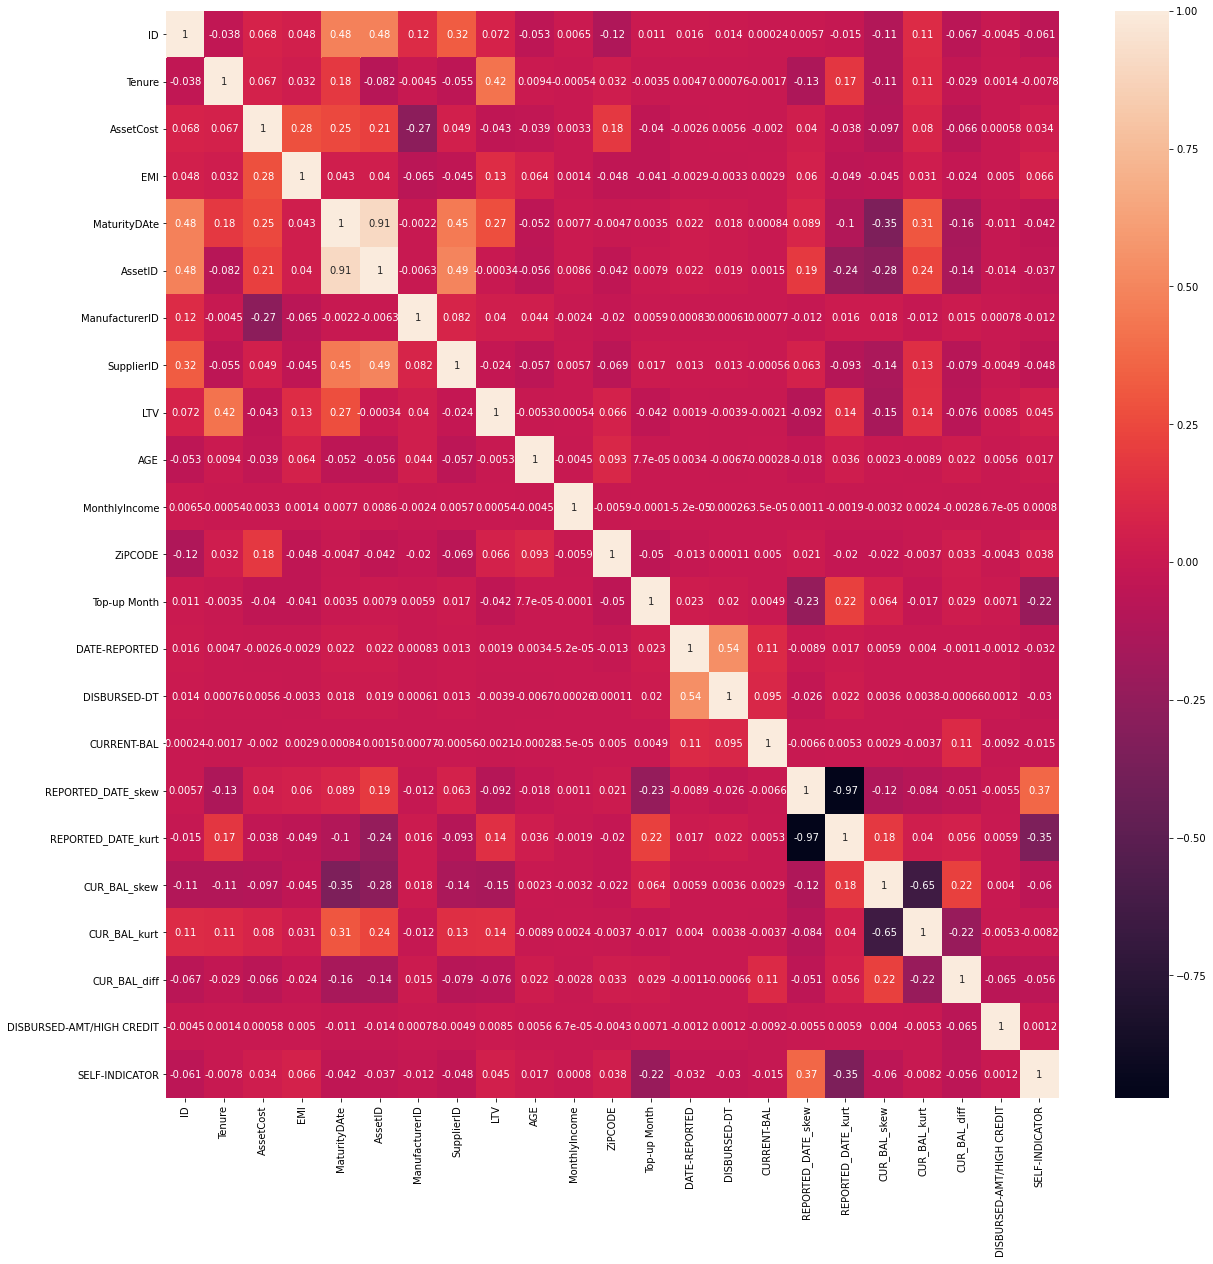

In [595]:
corr_matrix = df2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True)

# TEST DATA

In [596]:
df_test1 = pd.read_excel('test_Data.xlsx')
df_test1

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,...,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,...,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,...,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,...,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,...,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,Monthly,Arrear,Closed,PDC,143,NEW DELHI BARAKHAMBHA ROAD,35,530016,419616.0,...,4276747,1046.0,22094,79.17,NaN,NaN,NaN,GURGAON,HARYANA,122001.0
14741,143397,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,...,4746586,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14742,143398,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,...,4746588,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14743,143399,Monthly,Arrear,Closed,PDC_E,246,BIKANER,12,400000,280000.0,...,11719081,1046.0,63565,70.00,M,NaN,NaN,GANGANAGAR,RAJASTHAN,335001.0


In [597]:
test_index = list(df_test1['ID'])
test_index[:5]

[4, 5, 6, 25, 119]

In [598]:
df_test2 = pd.read_excel('test_bureau.xlsx')
df_test2

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,...,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,4,False,PRIMARY,Credit Card,CCC,2019-11-17,Individual,Active,2019-09-26,NaN,...,NaN,0,0.0,NaN,"20191117,",000,"589,","0,","0,",NaN
1,4,False,PRIMARY,Housing Loan,HFC,2019-10-31,Joint,Active,2017-06-21,NaN,...,F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"2107227,2122196,2136877,2151448,2165910,218026...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
2,4,False,PRIMARY,Property Loan,HFC,2019-10-31,Joint,Active,2017-06-27,NaN,...,F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"83458,84051,84632,85209,85781,86349,86913,8747...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
3,4,True,PRIMARY,Tractor Loan,NBF,2015-10-31,Individual,Closed,2011-12-29,2015-10-13 00:00:00,...,NaN,0,0.0,NaN,"20151031,20150901,20150831,20150731,20150630,2...",000DDD0270000000000000000000000000000000000000...,"0,,21548,32097,42500,52758,62874,72850,82688,9...","0,,11000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,5,False,PRIMARY,Gold Loan,PRB,2017-08-31,Individual,Closed,2016-05-04,2017-06-15 00:00:00,...,NaN,0,0.0,NaN,"20170630,20170501,20170401,20170331,20170201,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,25846,,,25846,,,25846,,,25846,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64014,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,...,NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"204173,243754,282926,321694,360063,398035,4356...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","42120,42120,42120,42120,42120,42120,42120,4212...",NaN
64015,143400,False,PRIMARY,Commercial Vehicle Loan,PRB,2018-02-28,Joint,Closed,2015-05-16,2018-02-24 00:00:00,...,NaN,0,0.0,Standard,"20180228,20180131,20171231,20171130,20171031,2...",0000000000000000000000000000000000000000000000...,"0,0,0,0,0,0,0,0,0,0,0,100494,200014,298570,396...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","1796,0,0,0,0,0,0,0,0,0,101475,101475,101475,10...",NaN
64016,143400,False,PRIMARY,Construction Equipment Loan,PRB,2019-10-31,Joint,Active,2017-04-12,NaN,...,NaN,0,0.0,Standard,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"179276,214030,248425,282466,316155,349498,3824...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","36984,36984,36984,36984,36984,36984,36984,3698...",NaN
64017,143400,True,PRIMARY,Tractor Loan,NBF,2014-08-31,Individual,Closed,2013-05-28,2014-08-31 00:00:00,...,NaN,0,0.0,NaN,"20140831,20140731,20140630,20140531,20140430,2...",000000000000000000000000000000000000000000000000,"0,0,0,27840,55324,82457,109244,135689,161796,1...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0",",,,,,,,,,,,,,,,,,",NaN


In [599]:
df_test1.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Area               546
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         0
AuthDate             0
AssetID              0
ManufacturerID       2
SupplierID           0
LTV                  0
SEX                  5
AGE                  7
MonthlyIncome       14
City                 0
State                0
ZiPCODE              1
dtype: int64

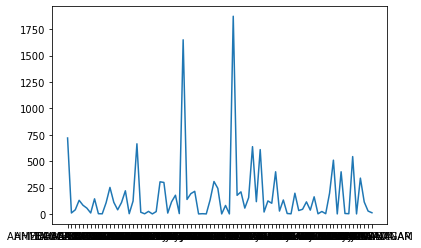

In [600]:
elements, counts = np.unique(df_test1.Area.dropna(), return_counts=True)
dict_area = {}

for i in range(len(elements)):
    dict_area[elements[i]] = counts[i]

plt.plot(elements,counts)

In [601]:
c, max_elements = 0, []
for i in range(len(counts)):
    if counts[i] >= 750:
        c+=1
        max_elements.append(elements[i])
        
print(c, df_test1.Area.isnull().sum()/c)

2 273.0


In [602]:
max_elements

['INDORE', 'KOTA']

In [603]:
cc=0

for i in range(len(df_test1.Area)):
    if type(df_test1.Area[i])!='str' and cc<273*1:
        df_test1.Area[i] = max_elements[0]
        cc+=1
    elif type(df_test1.Area[i])!='str':
        df_test1.Area[i] = max_elements[1]
        cc+=1
        
df_test1.Area.isnull().sum()

<ipython-input-603-594d413ff30b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1.Area[i] = max_elements[0]
<ipython-input-603-594d413ff30b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1.Area[i] = max_elements[1]


0

In [604]:
df_test1.SEX.value_counts()

M    14129
F      611
Name: SEX, dtype: int64

In [605]:
df_test1.SEX = df_test1.SEX.fillna('M')
df_test1.SEX.isnull().sum()

0

In [606]:
df_test1.AGE.value_counts()

37.0    477
30.0    470
31.0    463
34.0    456
36.0    453
       ... 
85.0      1
78.0      1
77.0      1
82.0      1
79.0      1
Name: AGE, Length: 65, dtype: int64

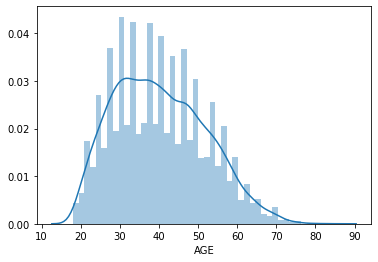

In [607]:
sns.distplot(df_test1.AGE)

In [608]:
for i in range(len(df_test1.AGE)):
    if np.isnan(df_test1.AGE[i]):
        df_test1.AGE[i] = np.random.randint(30,high=40)

df_test1.AGE.isnull().sum()

<ipython-input-608-83eb5f38f3e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1.AGE[i] = np.random.randint(30,high=40)


0

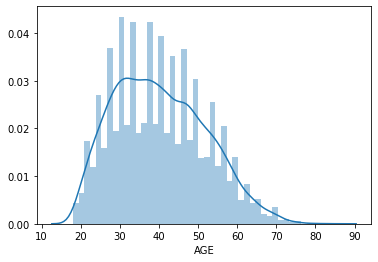

In [609]:
sns.distplot(df_test1.AGE)

In [610]:
df_test1['ManufacturerID'].value_counts()

1049.0    3524
1046.0    3087
1186.0    1728
1019.0    1540
1060.0    1533
1062.0    1298
1568.0    1183
1187.0     735
3473.0      74
2965.0      20
2608.0      19
2721.0       2
Name: ManufacturerID, dtype: int64

In [611]:
df_test1['ManufacturerID'] = df_test1['ManufacturerID'].fillna(1049.0)
df_test1['ManufacturerID'].isnull().sum()

0

In [612]:
df_test1['MonthlyIncome'].value_counts()

33333.33     1281
41666.67     1225
25000.00     1088
29166.67      993
50000.00      619
             ... 
59950.00        1
19266.67        1
42016.67        1
155933.33       1
54666.67        1
Name: MonthlyIncome, Length: 2470, dtype: int64

In [613]:
df_test1['MonthlyIncome'] = df_test1['MonthlyIncome'].fillna(33333.33)
df_test1['MonthlyIncome'].isnull().sum()

0

In [614]:
df_test1['ZiPCODE'].value_counts()

458441.0    461
454001.0    245
325004.0    211
465001.0    188
457001.0    151
           ... 
383317.0      1
768113.0      1
383316.0      1
132116.0      1
495663.0      1
Name: ZiPCODE, Length: 2182, dtype: int64

In [615]:
df_test1['ZiPCODE'] = df_test1['ZiPCODE'].fillna(458441.0)
df_test1['ZiPCODE'].isnull().sum()

0

In [616]:
df_test2.isnull().sum()

ID                               0
SELF-INDICATOR                   0
MATCH-TYPE                       0
ACCT-TYPE                        0
CONTRIBUTOR-TYPE                 0
DATE-REPORTED                    0
OWNERSHIP-IND                    0
ACCOUNT-STATUS                   0
DISBURSED-DT                    44
CLOSE-DT                     31453
LAST-PAYMENT-DATE            32550
CREDIT-LIMIT/SANC AMT        62421
DISBURSED-AMT/HIGH CREDIT       38
INSTALLMENT-AMT              47693
CURRENT-BAL                     32
INSTALLMENT-FREQUENCY        48243
OVERDUE-AMT                  13127
WRITE-OFF-AMT                 2561
ASSET_CLASS                  34902
REPORTED DATE - HIST          2561
DPD - HIST                    2565
CUR BAL - HIST                2561
AMT OVERDUE - HIST            2561
AMT PAID - HIST               2672
TENURE                       42882
dtype: int64

In [617]:
df_test2['DISBURSED-DT'] = pd.to_datetime(df_test2['DISBURSED-DT'].dropna()).astype(np.int64)
df_test2['DISBURSED-DT'] = df_test2['DISBURSED-DT'].interpolate(method='linear')

In [618]:
df_test2['DISBURSED-AMT/HIGH CREDIT'] = df_test2['DISBURSED-AMT/HIGH CREDIT'].fillna('0')
f = df_test2['DISBURSED-AMT/HIGH CREDIT'].copy(deep=True).to_numpy()
fh = np.zeros((len(f)))

for i in range(len(f)):
    l=0
    for j in f[i]:
        if j in [',','-']:
            f[i] = f[i].replace(j,'')
            
    fh[i] = int(f[i]) 

df_test2['DISBURSED-AMT/HIGH CREDIT'] = fh
df_test2['DISBURSED-AMT/HIGH CREDIT']

0            588.0
1        2500000.0
2          99000.0
3         365000.0
4          25801.0
           ...    
64014    1230000.0
64015    2000000.0
64016    1080000.0
64017     310000.0
64018     300000.0
Name: DISBURSED-AMT/HIGH CREDIT, Length: 64019, dtype: float64

In [619]:
df_test2['CURRENT-BAL'] = df_test2['CURRENT-BAL'].fillna('0')
f = df_test2['CURRENT-BAL'].copy(deep=True).to_numpy()
fh = np.zeros((len(f)))

for i in range(len(f)):
    l=0
    for j in f[i]:
        if j in [',','-']:
            f[i] = f[i].replace(j,'')
            
    fh[i] = int(f[i]) 

df_test2['CURRENT-BAL'] = fh
df_test2['CURRENT-BAL']

0            589.0
1        2107227.0
2          83458.0
3              0.0
4              0.0
           ...    
64014     204173.0
64015          0.0
64016     179276.0
64017          0.0
64018          0.0
Name: CURRENT-BAL, Length: 64019, dtype: float64

In [620]:
df_test2['REPORTED DATE - HIST'] = df_test2['REPORTED DATE - HIST'].fillna('00000000')
f = df_test2['REPORTED DATE - HIST'].copy(deep=True)
date_skew = np.zeros((len(f)))
date_kurt = np.zeros((len(f)))

for i in range(len(f)):
    f_list = f[i].split(',')
    date_numeric = np.zeros((len(f_list)))
    
    for j in range(len(f_list)):
        j1 = f_list[j]
        if len(j1)<8:
            continue
        yr,mth,date = int(f_list[j][:4]), int(f_list[j][4:6]), int(f_list[j][4:6])
        date_numeric[j]=(yr*365) + (mth*30) + date

    date_skew[i] = skew(date_numeric)
    date_kurt[i] = kurtosis(date_numeric)
    
df_test2['REPORTED_DATE_skew'] = date_skew
df_test2['REPORTED_DATE_kurt'] = date_kurt

In [621]:
df_test2['CUR BAL - HIST'] = df_test2['CUR BAL - HIST'].fillna('0')

f = df_test2['CUR BAL - HIST'].copy(deep=True)
curbal_skew = np.zeros((len(f)))
curbal_rate = np.zeros((len(f)))
curbal_kurt = np.zeros((len(f)))

for i in range(len(f)):
    f_list = f[i].split(',')
    curbal_numeric = np.zeros((len(f_list)))
    
    for j in range(len(f_list)):
        j1 = f_list[j]
        if len(j1)<3:
            continue
        curbal_numeric[j] = int(j1)
    curbal_skew[i] = skew(curbal_numeric)
    curbal_kurt[i] = kurtosis(curbal_numeric)
    curbal_rate[i] = np.sum(np.diff(curbal_numeric))
    
df_test2['CUR_BAL_skew'] = curbal_skew
df_test2['CUR_BAL_kurt'] = curbal_kurt
df_test2['CUR_BAL_diff'] = curbal_rate

In [622]:
c=0
k1=[None]*len(test_index)
k2=[None]*len(test_index)
k3=[None]*len(test_index)
k4=[None]*len(test_index)
k5=[None]*len(test_index)
k6=[None]*len(test_index)
k7=[None]*len(test_index)
k8=[None]*len(test_index)
k9=[None]*len(test_index)

for i in test_index:
    p1 = list(df_test2['DATE-REPORTED'][df_test2['ID']==i])
    p2 = list(df_test2['DISBURSED-DT'][df_test2['ID']==i])
    p3 = list(df_test2['CURRENT-BAL'][df_test2['ID']==i])
    p4 = list(df_test2['REPORTED_DATE_skew'][df_test2['ID']==i])
    p5 = list(df_test2['REPORTED_DATE_kurt'][df_test2['ID']==i])
    p6 = list(df_test2['CUR_BAL_skew'][df_test2['ID']==i])
    p7 = list(df_test2['CUR_BAL_kurt'][df_test2['ID']==i])
    p8 = list(df_test2['CUR_BAL_diff'][df_test2['ID']==i])
    p9 = list(df_test2['DISBURSED-AMT/HIGH CREDIT'][df_test2['ID']==i])
    
    k1[c] = np.sum(np.diff(p1))
    k2[c] = np.sum(np.diff(p2))
    k3[c] = np.sum(np.diff(p3))
    k4[c] = np.mean(p4)
    k5[c] = np.mean(p5)
    k6[c] = np.mean(p6)
    k7[c] = np.mean(p7)
    k8[c] = np.mean(p8)
    k9[c] = np.mean(p9)
    
    c+=1
    
df_test1['DATE-REPORTED'] = k1
df_test1['DISBURSED-DT'] = k2
df_test1['CURRENT-BAL'] = k3 
df_test1['REPORTED_DATE_skew'] = k4
df_test1['REPORTED_DATE_kurt'] = k5
df_test1['CUR_BAL_skew'] = k6
df_test1['CUR_BAL_kurt'] = k7
df_test1['CUR_BAL_diff'] = k8
df_test1['DISBURSED-AMT/HIGH CREDIT'] = k9

In [623]:
df_test1.isnull().sum()

ID                           0
Frequency                    0
InstlmentMode                0
LoanStatus                   0
PaymentMode                  0
BranchID                     0
Area                         0
Tenure                       0
AssetCost                    0
AmountFinance                0
DisbursalAmount              0
EMI                          0
DisbursalDate                0
MaturityDAte                 0
AuthDate                     0
AssetID                      0
ManufacturerID               0
SupplierID                   0
LTV                          0
SEX                          0
AGE                          0
MonthlyIncome                0
City                         0
State                        0
ZiPCODE                      0
DATE-REPORTED                0
DISBURSED-DT                 0
CURRENT-BAL                  0
REPORTED_DATE_skew           0
REPORTED_DATE_kurt           0
CUR_BAL_skew                 0
CUR_BAL_kurt                 0
CUR_BAL_

# SELF-INDICATOR (TEST)

In [624]:
df_selfind = pd.DataFrame((df_test2.groupby(['ID','SELF-INDICATOR'])['ID'].count()))
df_selfind

ID
ID     SELF-INDICATOR    
4      False            3
       True             1
5      False            7
       True             1
6      False           10
...                    ..
143398 True             2
143399 False           12
       True             4
143400 False           12
       True             4

[24721 rows x 1 columns]

In [625]:
k = np.zeros((len(df_test1)))
c=0

for i in test_index:
    if df_selfind['ID'][i].size==2:
        k[c] = df_selfind['ID'][i][0]/df_selfind['ID'][i][1]
    else:
        k[c] = 1
    c+=1

df_test1['SELF-INDICATOR'] = k

# MATCH TYPE (TEST)

In [626]:
matchtype_dict={}
for i,j in enumerate(df_test2['MATCH-TYPE'].unique()):
    matchtype_dict[j] = i
    
matchtype_dict

{'PRIMARY': 0, 'SECONDARY': 1}

In [627]:
matchtype_code = [None]*len(test_index)
c=0

for i in test_index:
    p = df_test2['MATCH-TYPE'][df_test2['ID']==i]
    code=''
    for j in p:
        char = str(matchtype_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    matchtype_code[c] = str(coded) 
    c+=1
    
df_test1['MATCH-TYPE'] = matchtype_code

# ACC-TYPE

In [628]:
acctype_dict={}
for i,j in enumerate(df_test2['ACCT-TYPE'].unique()):
    acctype_dict[j] = i
    
acctype_dict

{'Credit Card': 0,
 'Housing Loan': 1,
 'Property Loan': 2,
 'Tractor Loan': 3,
 'Gold Loan': 4,
 'Consumer Loan': 5,
 'Personal Loan': 6,
 'Auto Loan (Personal)': 7,
 'Business Loan Priority Sector  Agriculture': 8,
 'JLG Individual': 9,
 'Business Loan General': 10,
 'Two-Wheeler Loan': 11,
 'Business Loan Priority Sector  Small Business': 12,
 'Mudra Loans   Shishu / Kishor / Tarun': 13,
 'Other': 14,
 'Used Car Loan': 15,
 'Loan to Professional': 16,
 'Commercial Vehicle Loan': 17,
 'Construction Equipment Loan': 18,
 'Overdraft': 19,
 'Kisan Credit Card': 20,
 'Business Loan Priority Sector  Others': 21,
 'Education Loan': 22,
 'Loan Against Bank Deposits': 23,
 'Microfinance Business Loan': 24,
 'Microfinance Others': 25,
 'Business Loan Unsecured': 26,
 'Loan Against Shares / Securities': 27,
 'Business Loan - Secured': 28,
 'Prime Minister Jaan Dhan Yojana - Overdraft': 29,
 'Business Non-Funded Credit Facility-Priority Sector-Agriculture': 30,
 'Fleet Card': 31,
 'Individual':

In [629]:
acctype_code = [None]*len(test_index)
c=0

for i in test_index:
    p = df_test2['ACCT-TYPE'][df_test2['ID']==i]
    code=''
    for j in p:
        char = str(acctype_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    acctype_code[c] = str(coded) 
    c+=1
    
df_test1['ACCT-TYPE'] = acctype_code

# CONTRIBUTOR-TYPE (TEST)

In [630]:
cont_dict={}
for i,j in enumerate(df_test2['CONTRIBUTOR-TYPE'].unique()):
    cont_dict[j] = i
    
cont_dict

{'CCC': 0,
 'HFC': 1,
 'NBF': 2,
 'PRB': 3,
 'MFI': 4,
 'NAB': 5,
 'FRB': 6,
 'COP': 7,
 'RRB': 8,
 'SFB': 9,
 'OFI': 10}

In [631]:
cont_code = [None]*len(test_index)
c=0

for i in test_index:
    p = df_test2['CONTRIBUTOR-TYPE'][df_test2['ID']==i]
    code=''
    for j in p:
        char = str(cont_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    cont_code[c] = str(coded) 
    c+=1
    
df_test1['CONTRIBUTOR-TYPE'] = cont_code

# OWNERSHIP-IND (TEST)

In [632]:
owner_dict={}
for i,j in enumerate(df_test2['OWNERSHIP-IND'].unique()):
    owner_dict[j] = i
    
owner_dict

{'Individual': 0,
 'Joint': 1,
 'Guarantor': 2,
 'Primary': 3,
 'Supl Card Holder': 4}

In [633]:
owner_code = [None]*len(test_index)
c=0

for i in test_index:
    p = df_test2['OWNERSHIP-IND'][df_test2['ID']==i]
    code=''
    for j in p:
        char = str(owner_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    owner_code[c] = str(coded) 
    c+=1
    
df_test1['OWNERSHIP-IND'] = owner_code

# ACCOUNT-STATUS

In [634]:
accstatus_dict={}
for i,j in enumerate(df_test2['ACCOUNT-STATUS'].unique()):
    accstatus_dict[j] = i
    
accstatus_dict

{'Active': 0,
 'Closed': 1,
 'Delinquent': 2,
 'Settled': 3,
 'Written Off': 4,
 'Suit Filed': 5,
 'SUIT FILED (WILFUL DEFAULT)': 6,
 'Restructured': 7,
 'WILFUL DEFAULT': 8}

In [635]:
accstatus_code = [None]*len(test_index)
c=0

for i in test_index:
    p = df_test2['ACCOUNT-STATUS'][df_test2['ID']==i]
    code=''
    for j in p:
        char = str(accstatus_dict[j])
        if char not in code:
            code+=char
    code=set(code)
    
    coded=[]
    for j in code:
        j=int(j)
        coded.append(j)
    coded.sort()
    
    coded = ''.join([str(element) for element in coded])
    accstatus_code[c] = str(coded) 
    c+=1
    
df_test1['ACCOUNT-STATUS'] = accstatus_code

In [636]:
df_test1

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,OWNERSHIP-IND,ACCOUNT-STATUS
0,4,Monthly,Advance,Closed,PDC_E,2,INDORE,46,480000,365000.0,...,-2.340068,9.738142,-5.478185e+05,7.411470e+05,3.000000,0,0123,012,01,01
1,5,Monthly,Advance,Closed,PDC,2,INDORE,45,480000,285000.0,...,-0.798093,0.620175,-1.134039e+05,2.424766e+05,7.000000,0,13456,1234,01,01
2,6,Quatrly,Arrear,Closed,PDC,2,INDORE,48,580000,400000.0,...,-0.117503,-1.999515,-8.566667e+03,2.697801e+05,5.000000,0,3467,23,012,01
3,25,Half Yearly,Arrear,Closed,Billed,154,INDORE,36,725000,500000.0,...,0.498452,-0.745860,-6.379650e+04,4.000000e+05,1.000000,0,38,25,0,01
4,119,Quatrly,Arrear,Closed,PDC,194,INDORE,48,617000,400000.0,...,-0.042176,-1.159444,-5.810000e+04,4.650000e+05,1.000000,0,37,2,02,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,Monthly,Arrear,Closed,PDC,143,KOTA,35,530016,419616.0,...,-0.452900,1.118744,-3.143441e+05,1.292226e+06,0.695652,0,01237,1236,012,01
14741,143397,Monthly,Arrear,Closed,PDC,32,KOTA,36,595000,446500.0,...,-0.650571,-0.167495,-6.406842e+06,8.443833e+06,2.000000,0,0123,256,01,01
14742,143398,Monthly,Arrear,Closed,PDC,32,KOTA,36,595000,446500.0,...,-0.650571,-0.167495,-6.406842e+06,8.443833e+06,2.000000,0,0123,256,01,01
14743,143399,Monthly,Arrear,Closed,PDC_E,246,KOTA,12,400000,280000.0,...,0.183617,-1.170485,-3.834425e+04,8.232919e+05,3.000000,0,01378,23,01,01


In [637]:
len(df_test1.columns), len(df2.columns)

(40, 35)

In [638]:
for i in df_test1.columns:
    if i not in df2.columns:
        df_test1 = df_test1.drop(columns=[i])
        
len(df_test1.columns), len(df2.columns)

(34, 35)

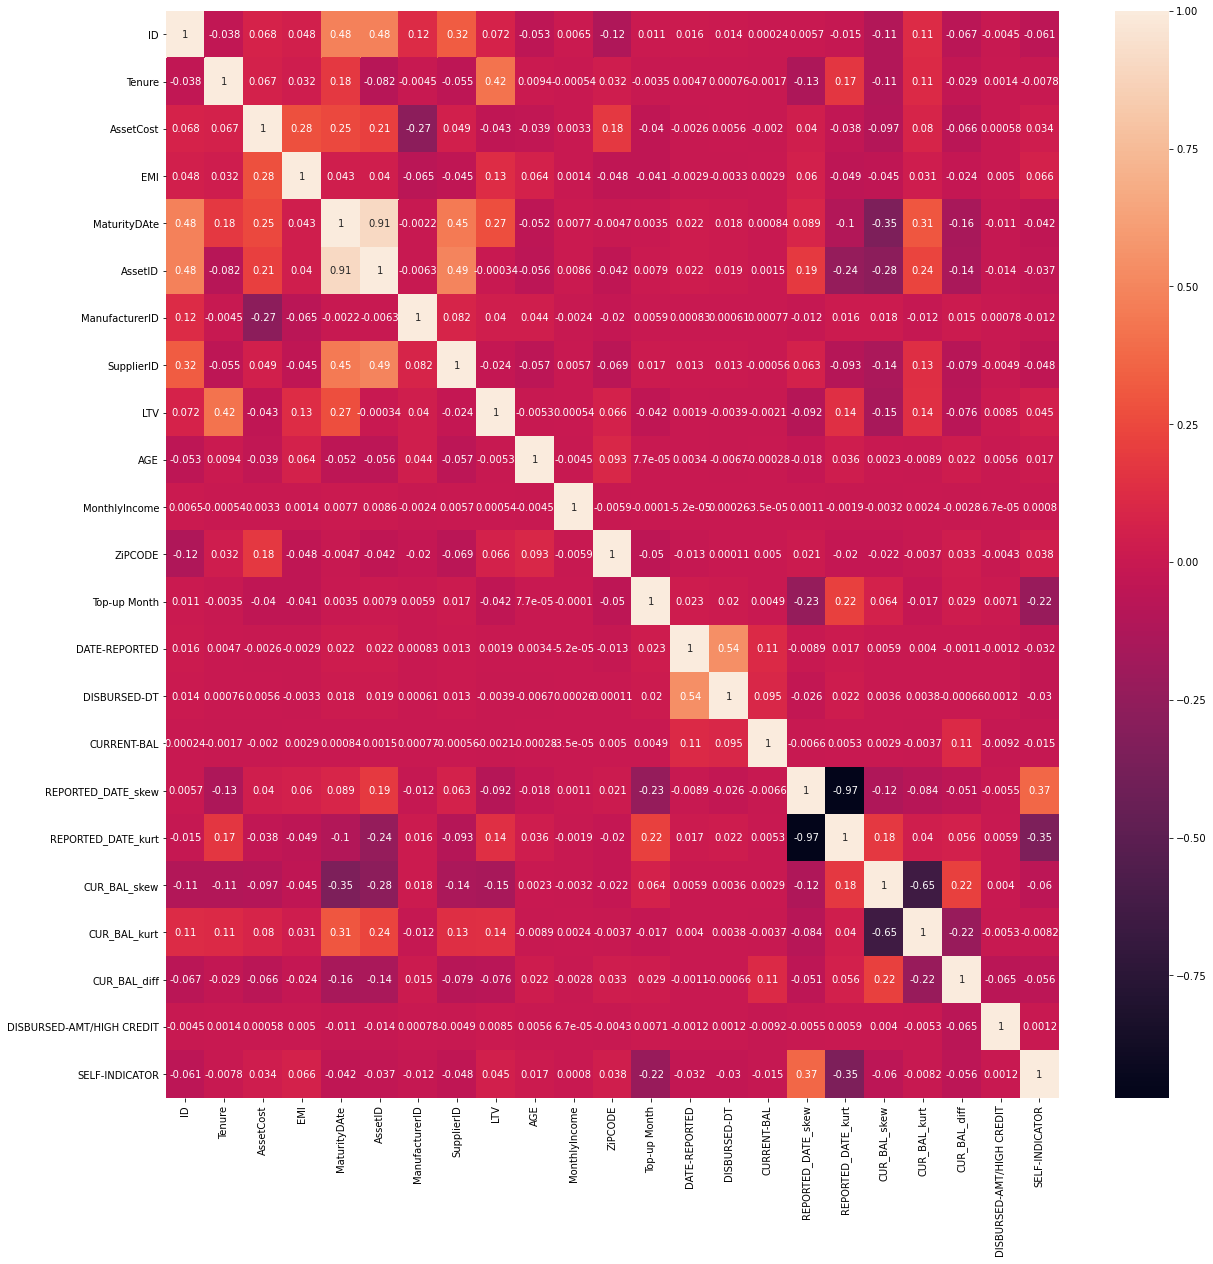

In [639]:
corr_matrix = df2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True)

In [640]:
df2 = df2.drop(columns=['MaturityDAte','REPORTED_DATE_skew','DATE-REPORTED','SupplierID'])
df_test1 = df_test1.drop(columns=['MaturityDAte','REPORTED_DATE_skew','DATE-REPORTED','SupplierID'])

In [641]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128654 entries, 0 to 128653
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         128654 non-null  int64  
 1   Frequency                  128654 non-null  object 
 2   InstlmentMode              128654 non-null  object 
 3   LoanStatus                 128654 non-null  object 
 4   PaymentMode                128654 non-null  object 
 5   Area                       128654 non-null  object 
 6   Tenure                     128654 non-null  int64  
 7   AssetCost                  128654 non-null  int64  
 8   EMI                        128654 non-null  float64
 9   AssetID                    128654 non-null  int64  
 10  ManufacturerID             128654 non-null  int64  
 11  LTV                        128654 non-null  float64
 12  SEX                        128654 non-null  object 
 13  AGE                        12

# CATEGORICAL FEATURE ENCODING

In [642]:
df2.columns, df_test1.columns

(Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Area',
        'Tenure', 'AssetCost', 'EMI', 'AssetID', 'ManufacturerID', 'LTV', 'SEX',
        'AGE', 'MonthlyIncome', 'State', 'ZiPCODE', 'Top-up Month',
        'DISBURSED-DT', 'CURRENT-BAL', 'REPORTED_DATE_kurt', 'CUR_BAL_skew',
        'CUR_BAL_kurt', 'CUR_BAL_diff', 'DISBURSED-AMT/HIGH CREDIT',
        'SELF-INDICATOR', 'MATCH-TYPE', 'ACCT-TYPE', 'CONTRIBUTOR-TYPE',
        'OWNERSHIP-IND', 'ACCOUNT-STATUS'],
       dtype='object'),
 Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Area',
        'Tenure', 'AssetCost', 'EMI', 'AssetID', 'ManufacturerID', 'LTV', 'SEX',
        'AGE', 'MonthlyIncome', 'State', 'ZiPCODE', 'DISBURSED-DT',
        'CURRENT-BAL', 'REPORTED_DATE_kurt', 'CUR_BAL_skew', 'CUR_BAL_kurt',
        'CUR_BAL_diff', 'DISBURSED-AMT/HIGH CREDIT', 'SELF-INDICATOR',
        'MATCH-TYPE', 'ACCT-TYPE', 'CONTRIBUTOR-TYPE', 'OWNERSHIP-IND',
        'ACCOUNT-STATUS'],
      

In [643]:
cat_features=['Frequency','InstlmentMode', 'LoanStatus', 'PaymentMode', 'Area',
             'AssetID', 'ManufacturerID','SEX','State', 'ZiPCODE','MATCH-TYPE',
              'ACCT-TYPE', 'CONTRIBUTOR-TYPE','OWNERSHIP-IND', 'ACCOUNT-STATUS']

for col in cat_features:
    df2[col] = df2[col].astype('category')
    df_test1[col] = df_test1[col].astype('category')

In [644]:
df2['Area']

Sl
0         INDORE
1         INDORE
2         INDORE
3         INDORE
4         INDORE
           ...  
128649     SIRSA
128650     SIRSA
128651     SIRSA
128652     SIRSA
128653     SIRSA
Name: Area, Length: 128654, dtype: category
Categories (5, object): [INDORE, KANPUR, LUCKNOW, NELLORE, SIRSA]

In [645]:
df2['ZiPCODE'] = df2['ZiPCODE'].astype('int64')
df_test1['ZiPCODE'] = df_test1['ZiPCODE'].astype('int64')
df2['ZiPCODE']

Sl
0         464993
1         466001
2         462030
3         473335
4         495442
           ...  
128649    131403
128650    131403
128651    131024
128652    131103
128653    131402
Name: ZiPCODE, Length: 128654, dtype: int64

In [646]:
df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,AssetID,...,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,OWNERSHIP-IND,ACCOUNT-STATUS
Sl,,,,,,,,,,,,,,,,,,,,,
0,1,Monthly,Arrear,Closed,PDC_E,INDORE,48,450000,24000.0,4022465,...,-0.646473,0.558120,-71464.000000,2.445947e+05,0.8,0,0123,01,0,012
1,2,Monthly,Advance,Closed,PDC,INDORE,47,485000,10500.0,4681175,...,-0.146306,0.994214,-796112.076923,1.393622e+06,12.0,0,0124567,12,01,12
2,3,Quatrly,Arrear,Active,Direct Debit,INDORE,68,690000,38300.0,25328146,...,-0.594113,-0.600568,-75327.903226,1.196248e+05,14.5,0,0123689,01234,012,012
3,7,Monthly,Advance,Closed,Billed,INDORE,48,480000,11600.0,13021591,...,-1.001970,1.153509,-156000.000000,3.181382e+05,1.0,0,29,1,0,12
4,8,Monthly,Arrear,Closed,Billed,INDORE,44,619265,15000.0,3291320,...,-0.998787,0.493721,-139159.857143,2.893166e+05,6.0,0,269,012,012,0123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,143390,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,470000,76800.0,31286914,...,-0.972829,0.071876,-933815.000000,1.043800e+06,1.0,0,12,12,0,1
128650,143391,Half Yearly,Arrear,Closed,Direct Debit,SIRSA,24,460000,80100.0,31295422,...,-0.446012,-0.098809,-73890.000000,2.756300e+05,1.0,0,2,1,0,1
128651,143393,Monthly,Arrear,Active,Direct Debit,SIRSA,23,545000,15277.0,32145629,...,-0.358243,-0.304922,-61033.250000,1.761380e+05,3.0,0,12,1,01,12


In [648]:
df2.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Area',
       'Tenure', 'AssetCost', 'EMI', 'AssetID', 'ManufacturerID', 'LTV', 'SEX',
       'AGE', 'MonthlyIncome', 'State', 'ZiPCODE', 'Top-up Month',
       'DISBURSED-DT', 'CURRENT-BAL', 'REPORTED_DATE_kurt', 'CUR_BAL_skew',
       'CUR_BAL_kurt', 'CUR_BAL_diff', 'DISBURSED-AMT/HIGH CREDIT',
       'SELF-INDICATOR', 'MATCH-TYPE', 'ACCT-TYPE', 'CONTRIBUTOR-TYPE',
       'OWNERSHIP-IND', 'ACCOUNT-STATUS'],
      dtype='object')

In [649]:
tc1 = TargetEncoder()
df2['Frequency'] = tc1.fit_transform(df2['Frequency'], df2['Top-up Month'])

tc2 = TargetEncoder()
df2['InstlmentMode'] = tc2.fit_transform(df2['InstlmentMode'], df2['Top-up Month'])

tc3 = TargetEncoder()
df2['LoanStatus'] = tc3.fit_transform(df2['LoanStatus'], df2['Top-up Month'])

tc4 = TargetEncoder()
df2['PaymentMode'] = tc4.fit_transform(df2['PaymentMode'], df2['Top-up Month'])

tc5 = TargetEncoder()
df2['Area'] = tc5.fit_transform(df2['Area'], df2['Top-up Month'])

tc6 = TargetEncoder()
df2['SEX'] = tc6.fit_transform(df2['SEX'], df2['Top-up Month'])

tc7 = TargetEncoder()
df2['State'] = tc7.fit_transform(df2['State'], df2['Top-up Month'])

tc8 = TargetEncoder()
df2['MATCH-TYPE'] = tc8.fit_transform(df2['MATCH-TYPE'], df2['Top-up Month'])

tc9 = TargetEncoder()
df2['ACCT-TYPE'] = tc9.fit_transform(df2['ACCT-TYPE'], df2['Top-up Month'])

tc10 = TargetEncoder()
df2['CONTRIBUTOR-TYPE'] = tc10.fit_transform(df2['CONTRIBUTOR-TYPE'], df2['Top-up Month'])

tc11 = TargetEncoder()
df2['OWNERSHIP-IND'] = tc11.fit_transform(df2['OWNERSHIP-IND'], df2['Top-up Month'])

tc12 = TargetEncoder()
df2['ACCOUNT-STATUS'] = tc12.fit_transform(df2['ACCOUNT-STATUS'], df2['Top-up Month'])

tc13 = TargetEncoder()
df2['AssetID'] = tc13.fit_transform(df2['AssetID'], df2['Top-up Month'])

tc14 = TargetEncoder()
df2['ManufacturerID'] = tc14.fit_transform(df2['ManufacturerID'], df2['Top-up Month'])

tc15 = TargetEncoder()
df2['ZiPCODE'] = tc15.fit_transform(df2['ZiPCODE'], df2['Top-up Month'])

df2

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,AssetID,...,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,OWNERSHIP-IND,ACCOUNT-STATUS
Sl,,,,,,,,,,,,,,,,,,,,,
0,1,5.375197,5.338976,5.372699,5.372245,5.360944,48,450000,24000.0,5.338583,...,-0.646473,0.558120,-71464.000000,2.445947e+05,0.8,5.338728,4.722677,5.137349,5.468729,4.812573
1,2,5.375197,5.330955,5.372699,5.301950,5.360944,47,485000,10500.0,5.338583,...,-0.146306,0.994214,-796112.076923,1.393622e+06,12.0,5.338728,2.985167,5.230801,5.010324,5.010301
2,3,5.428468,5.338976,5.244349,5.364300,5.360944,68,690000,38300.0,5.338583,...,-0.594113,-0.600568,-75327.903226,1.196248e+05,14.5,5.338728,3.777778,4.291667,4.731026,4.812573
3,7,5.375197,5.330955,5.372699,5.335460,5.360944,48,480000,11600.0,5.338583,...,-1.001970,1.153509,-156000.000000,3.181382e+05,1.0,5.338728,4.737384,5.690653,5.468729,5.010301
4,8,5.375197,5.338976,5.372699,5.335460,5.360944,44,619265,15000.0,5.338583,...,-0.998787,0.493721,-139159.857143,2.893166e+05,6.0,5.338728,4.113208,4.592528,4.731026,3.889375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128649,143390,5.296900,5.338976,5.372699,5.364300,5.336342,24,470000,76800.0,5.338583,...,-0.972829,0.071876,-933815.000000,1.043800e+06,1.0,5.338728,5.063128,5.230801,5.468729,5.448549
128650,143391,5.296900,5.338976,5.372699,5.364300,5.336342,24,460000,80100.0,5.338583,...,-0.446012,-0.098809,-73890.000000,2.756300e+05,1.0,5.338728,5.711511,5.690653,5.468729,5.448549
128651,143393,5.375197,5.338976,5.244349,5.364300,5.336342,23,545000,15277.0,5.338583,...,-0.358243,-0.304922,-61033.250000,1.761380e+05,3.0,5.338728,5.063128,5.690653,5.010324,5.010301


In [650]:
df_test1['Frequency']=tc1.transform(df_test1['Frequency'])
df_test1['InstlmentMode']=tc2.transform(df_test1['InstlmentMode'])
df_test1['LoanStatus']=tc3.transform(df_test1['LoanStatus'])
df_test1['PaymentMode']=tc4.transform(df_test1['PaymentMode'])
df_test1['Area']=tc5.transform(df_test1['Area'])
df_test1['SEX']=tc6.transform(df_test1['SEX'])
df_test1['State']=tc7.transform(df_test1['State'])
df_test1['MATCH-TYPE']=tc8.transform(df_test1['MATCH-TYPE'])
df_test1['ACCT-TYPE']=tc9.transform(df_test1['ACCT-TYPE'])
df_test1['CONTRIBUTOR-TYPE']=tc10.transform(df_test1['CONTRIBUTOR-TYPE'])
df_test1['OWNERSHIP-IND']=tc11.transform(df_test1['OWNERSHIP-IND'])
df_test1['ACCOUNT-STATUS']=tc12.transform(df_test1['ACCOUNT-STATUS'])
df_test1['AssetID']=tc13.transform(df_test1['AssetID'])
df_test1['ManufacturerID']=tc14.transform(df_test1['ManufacturerID'])
df_test1['ZiPCODE']=tc15.transform(df_test1['ZiPCODE'])

df_test1

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,Area,Tenure,AssetCost,EMI,AssetID,...,CUR_BAL_skew,CUR_BAL_kurt,CUR_BAL_diff,DISBURSED-AMT/HIGH CREDIT,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,OWNERSHIP-IND,ACCOUNT-STATUS
0,4,5.375197,5.330955,5.372699,5.372245,5.360944,46,480000,1000.0,5.338583,...,-2.340068,9.738142,-5.478185e+05,7.411470e+05,3.000000,5.338728,4.722677,4.592528,5.010324,5.302971
1,5,5.375197,5.330955,5.372699,5.301950,5.360944,45,480000,9300.0,5.338583,...,-0.798093,0.620175,-1.134039e+05,2.424766e+05,7.000000,5.338728,5.822117,5.143341,5.010324,5.302971
2,6,5.428468,5.338976,5.372699,5.301950,5.360944,48,580000,35800.0,5.338583,...,-0.117503,-1.999515,-8.566667e+03,2.697801e+05,5.000000,5.338728,5.338583,5.398895,4.731026,5.302971
3,25,5.296900,5.338976,5.372699,5.335460,5.360944,36,725000,52000.0,5.338583,...,0.498452,-0.745860,-6.379650e+04,4.000000e+05,1.000000,5.338728,5.988104,4.882353,5.468729,5.302971
4,119,5.428468,5.338976,5.372699,5.301950,5.360944,48,617000,35400.0,5.338583,...,-0.042176,-1.159444,-5.810000e+04,4.650000e+05,1.000000,5.338728,5.338583,5.141732,5.035849,5.302971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,5.375197,5.338976,5.372699,5.301950,5.338583,35,530016,14723.0,5.338583,...,-0.452900,1.118744,-3.143441e+05,1.292226e+06,0.695652,5.338728,5.000000,4.500000,4.731026,5.302971
14741,143397,5.375197,5.338976,5.372699,5.301950,5.338583,36,595000,15491.0,5.338583,...,-0.650571,-0.167495,-6.406842e+06,8.443833e+06,2.000000,5.338728,4.722677,4.725530,5.010324,5.302971
14742,143398,5.375197,5.338976,5.372699,5.301950,5.338583,36,595000,15491.0,5.338583,...,-0.650571,-0.167495,-6.406842e+06,8.443833e+06,2.000000,5.338728,4.722677,4.725530,5.010324,5.302971
14743,143399,5.375197,5.338976,5.372699,5.372245,5.338583,12,400000,25350.0,5.338583,...,0.183617,-1.170485,-3.834425e+04,8.232919e+05,3.000000,5.338728,4.539771,5.398895,5.010324,5.302971


In [ ]:
df2 = df2.drop(columns=['ID'])
df_test1 = df_test1.drop(columns=['ID'])

In [651]:
df_test1.isnull().sum().sum()

0

In [652]:
df2.isnull().sum().sum()

0

In [653]:
features = list(df2.drop(columns=['Top-up Month']).columns)
features

['ID',
 'Frequency',
 'InstlmentMode',
 'LoanStatus',
 'PaymentMode',
 'Area',
 'Tenure',
 'AssetCost',
 'EMI',
 'AssetID',
 'ManufacturerID',
 'LTV',
 'SEX',
 'AGE',
 'MonthlyIncome',
 'State',
 'ZiPCODE',
 'DISBURSED-DT',
 'CURRENT-BAL',
 'REPORTED_DATE_kurt',
 'CUR_BAL_skew',
 'CUR_BAL_kurt',
 'CUR_BAL_diff',
 'DISBURSED-AMT/HIGH CREDIT',
 'SELF-INDICATOR',
 'MATCH-TYPE',
 'ACCT-TYPE',
 'CONTRIBUTOR-TYPE',
 'OWNERSHIP-IND',
 'ACCOUNT-STATUS']

In [654]:
X = df2.drop(columns=['Top-up Month','ID']).to_numpy()
y = df2['Top-up Month'].to_numpy()

test = df_test1.drop(columns=['ID']).to_numpy()

X.shape, y.shape, test.shape

((128654, 29), (128654,), (14745, 29))

In [ ]:
cat_features=['AssetID', 'ManufacturerID','ZiPCODE']
cat_feat_indices = [None]*len(cat_features)
c=0
for i in features:
    if i in cat_features:
        cat_feat_indices[c] = features.index(i)
        c+=1
        
cat_feat_indices

In [657]:
pool= Pool(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

train_pool = Pool(data=X_train,
                 label=y_train)

validation_pool = Pool(data=X_test,
                 label=y_test)

model= CatBoostClassifier(iterations=2000,
                         learning_rate=0.2,
                         custom_metric='F1',
                         eval_metric='TotalF1')

model.fit(train_pool,eval_set=validation_pool,verbose=500, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7517367	test: 0.7517117	best: 0.7517117 (0)	total: 188ms	remaining: 6m 16s
500:	learn: 0.8385832	test: 0.8032673	best: 0.8035703 (461)	total: 1m 9s	remaining: 3m 29s


KeyboardInterrupt: 

In [658]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
xgb = XGBClassifier()

In [659]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb.score()

In [678]:
y_pred = xgb.predict_proba(test)


In [ ]:
y_pred = model.predict_proba(test)
y_pred

In [679]:
yfinal=np.zeros((len(y_pred)))
for i in range(len(yfinal)):
    yfinal[i] = np.argmax(y_pred[i])

In [ ]:
df2['Top-up Month'].value_counts()

In [680]:
ytrain2 = le.inverse_transform(df2['Top-up Month'])
vals,counts = np.unique(ytrain2, return_counts=True)

vals,counts

(array([' > 48 Months', '12-18 Months', '18-24 Months', '24-30 Months',
        '30-36 Months', '36-48 Months', 'No Top-up Service'], dtype=object),
 array([  8366,   1034,   2368,   3492,   3062,   3656, 106676],
       dtype=int64))

In [681]:
yfinal =yfinal.astype('int64')

In [682]:
d={0:'> 48 Months',
   1:'12-18 Months',
   2:'12-18 Months',
   3:'24-30 Months',
   4:'30-36 Months',
   5:'36-48 Months',
   6:'No Top-up Service',
  }

yfinal2 = [None]*len(yfinal)

for i in range(len(yfinal)):
    yfinal2[i] = d[yfinal[i]]
    
yfinal2 = np.array(yfinal2)
yfinal2

array(['No Top-up Service', 'No Top-up Service', 'No Top-up Service', ...,
       'No Top-up Service', 'No Top-up Service', 'No Top-up Service'],
      dtype='<U17')

In [683]:
np.unique(yfinal2)

array(['12-18 Months', '24-30 Months', '30-36 Months', '36-48 Months',
       '> 48 Months', 'No Top-up Service'], dtype='<U17')

In [684]:
import csv

with open('SUBMISSION2.csv','w',newline='') as csvfile:
    fieldnames=['ID','Top-up Month']
    thewriter=csv.DictWriter(csvfile,fieldnames=fieldnames)
    thewriter.writeheader()
    p_d=df_test1['ID']
    
    for i in range(len(yfinal)):
        thewriter.writerow({'ID':p_d[i],'Top-up Month':yfinal2[i]})